In [1]:
import requests
import nltk
import pandas as pd
import re
import sys
from fake_useragent import UserAgent
import csv
import os
import time
import bs4 

In [2]:
df = pd.read_csv('reddit (label xps) all.csv')
df

,counter,post date,model,source,number of likes,number of comments,title,content,link,label
0,1,2023-01-11,xps 17 9710,dellxps - reddit,1,0,dell xps 17 9710 (i7 11800h | 32gb ram | rtx30...,"hello everyone, i purchased an xps 17 9710 in ...",https://www.reddit.com/r/DellXPS/comments/108s...,question (technical)
1,2,2023-01-11,xps 17 9710,dell - reddit,1,0,discussiondell xps 17 9710 (i7 11800h | 32gb r...,"hello everyone, i purchased an xps 17 9710 in ...",https://www.reddit.com/r/Dell/comments/108s48j...,question (technical)
2,3,2023-01-10,xps 8960,xps - reddit,1,0,"evidently, the dell xps 8960 will have certain...",dell has not as yet announced the follow-on to...,https://www.reddit.com/r/XPS/comments/108mcgo/...,question (technical)
3,4,2023-01-10,xps 15 9520,dellxps - reddit,2,2,anyone else having issues with a brand new xps...,i am trying to use whatever resources that are...,https://www.reddit.com/r/DellXPS/comments/108m...,question (technical)
4,5,2023-01-10,xps 15 9510,dellxps - reddit,1,2,thinking about adding storage to my xps 9510 w...,anything with nvme and the largest size you ca...,https://www.reddit.com/r/DellXPS/comments/108i...,question (purchasing)
...,...,...,...,...,...,...,...,...,...,...
1795,1796,2022-03-09,xps 15 9510,dell - reddit,5,5,xps discussionis there any info about when the...,i'm waiting to get an xps 15 until they are up...,https://www.reddit.com/r/Dell/comments/ta9eee/...,question (operations)
1796,1797,2022-03-09,xps 15 9510,dell - reddit,2,1,discussionis the dell xps 15 9510 no longer in...,i noticed that you are no longer able to outfi...,https://www.reddit.com/r/Dell/comments/ta97ss/...,question (operations)
1797,1798,2022-03-08,xps 15 9510,dellxps - reddit,2,3,another xps 15 9510 hdmi no sound post,"as the title says, i can't enable the sound op...",https://www.reddit.com/r/DellXPS/comments/t9r1...,question (technical)
1798,1799,2022-03-07,xps 15 9510,dellxps - reddit,9,7,elden ring on xps 9510 rtx 3050 ti mobile?,"hi there, i'm probably not the only one with t...",https://www.reddit.com/r/DellXPS/comments/t8ws...,question (technical)


In [4]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

titles = ' '.join(df['content'])

# Tokenizing the text
tokens = tokenizer.tokenize(titles)

# Printing out the first 8 words / tokens 
print(tokens[:30])
titles

['hello', 'everyone', 'i', 'purchased', 'an', 'xps', '17', '9710', 'in', 'january', '2020', 'and', 'just', 'after', '1', 'week', 'of', 'use', 'i', 'entered', 'the', 'uefi', 'bios', 'version', '1', '6', '0', 'and', 'changed', 'some']


'hello everyone, i purchased an xps 17 9710 in january 2020 and just after 1 week of use i entered the uefi bios (version 1.6.0) and changed some settings, nothing serious just the keyboard backlight and battery settings. after restart, the pc won´t pass dell logo (no post) as dell call it. and the status light in the front of the laptop flashed 2 times amber and 8 times white. started to research on it and found out that according to dell "display failure - ec detection of power rail failure". dell support team troubleshooted the device and then advice for a motherboard replacement due to the that power rail failure. a month later i received my device and entered bios... i was in real disbelief when again the same happened, and again the motherboard was replaced. after the second replacement i updated the uefi bios firmware to the latest version and as my warranty is running out, i contacted dell to talk about this. the support agent ran a couple of test on my computer and advised to 

In [5]:
nltk.download('stopwords')

stopwordslist = ["helpxps", "dell", "xps", '13', '15', '17', '2','3', '0', '1', '8950', 'vs', '3050', '11', 'm1', 'i7','ram','ssd','support',
                 '9305', '9310', '9320', '9510', '9520', '9710', '9720', 'running', 'first', 'update', 'able', 'well', 'getting', 'plus', 'performance','discussionxps', 'helpdell', 'discussiondell',
                 'would', 'around', 'used','find', 'run', 'else', 'machine', 'see', 'gen', 'working','going', 'anything', 'model', 'also', 'know', 'work', 'anyone', 'one', 'tried', 'problem', 'need', 'could', 'use', 'intel','4k',
                 'get', 'something', 'better', 'help', 'using', 'really', 'like', 'thanks', 'time', 'buy', '3rd', 'laptop', 'back', 'even','two',
                 '4', '5', 'com','hi', 'good', 'however', 'seems', 'sure', 'go', 'lot', 'pro', '10', 'fine', 'bought', 
                 'right', 'much', 'looking', 'think', '32gb','life', 'want', 'every','https', 'since', 'issue', 'issues',
                 'another', 'got', 'new','still', 'will', 'apple', 'across', 'w', 'c', 'pd', 'news', 'known', 'xps13']

# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

sw.extend(stopwordslist)

# Printing out the first eight stop words
print(sw[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xup641284\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# A new list to hold Moby Dick with No Stop words
words_ns = []

# Appending to words_ns all words that are in words but not in sw
for word in tokens:
    if word not in sw:
        words_ns.append(word)

# Printing the first 5 words_ns to check that stop words are gone
print(words_ns[:30])

['hello', 'everyone', 'purchased', 'january', '2020', 'week', 'entered', 'uefi', 'bios', 'version', '6', 'changed', 'settings', 'nothing', 'serious', 'keyboard', 'backlight', 'battery', 'settings', 'restart', 'pc', 'pass', 'logo', 'post', 'call', 'status', 'light', 'front', 'flashed', 'times']


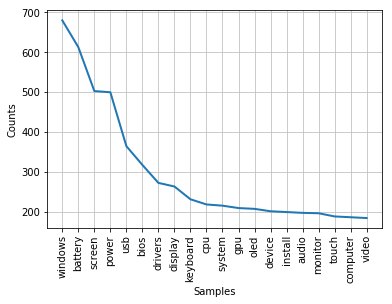

[('windows', 680), ('battery', 613), ('screen', 503), ('power', 500), ('usb', 365), ('bios', 318), ('drivers', 273), ('display', 264), ('keyboard', 232), ('cpu', 219), ('system', 216), ('gpu', 210), ('oled', 208), ('device', 202), ('install', 200), ('audio', 198), ('monitor', 197), ('touch', 189), ('computer', 187), ('video', 185)]


In [7]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(20)
print(freqdist.most_common(20))

# XPS wordcloud

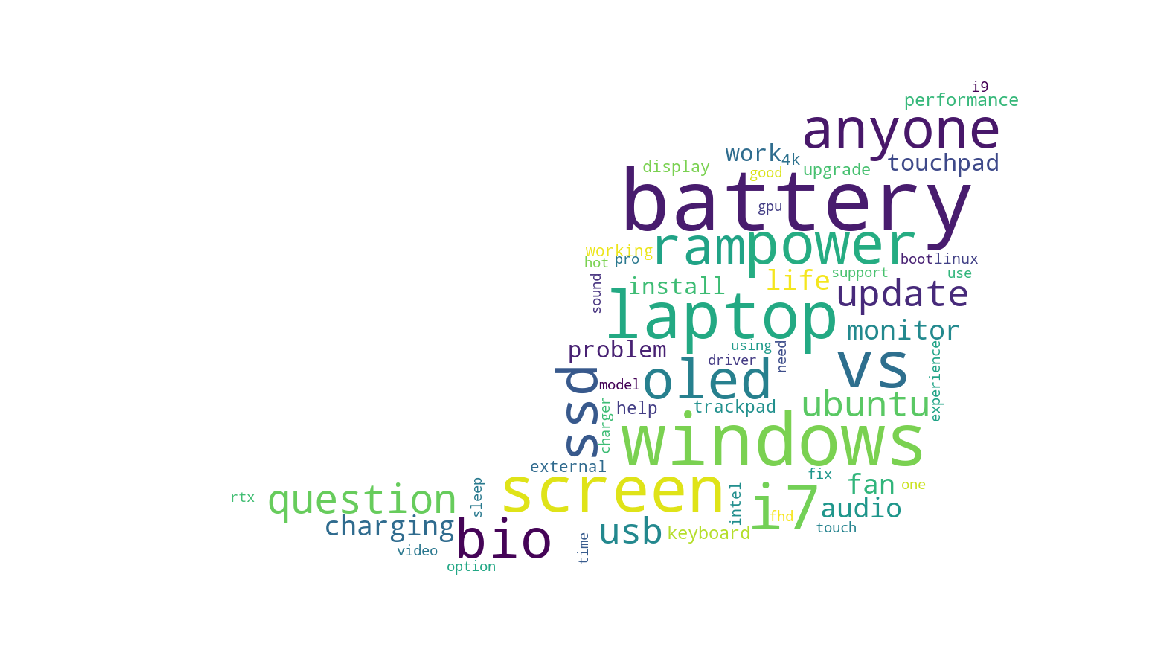

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

mask = np.array(Image.open('xps.jpg'))

stopwordslist = ['8950', '9300','9520','9720', '9315', '9310', '9320','9710', '9510', '9305', '11', '2022', '17', '13', '15', 'helpxps', 'helpxps13', 'dell', 'xps', 'anybody', 'discussionis', 'discussionxps', 'helpdell', 'discussiondell', 'buy', '3rd', 'issue', 'issues', 'does', 'another', 'got', 'new', 'still', 'will', 'apple', 'across','plus', 'w', 'c', 'pd', 'news', 'known', 'xps13']
stopwords = stopwordslist + list(STOPWORDS)

# Join the different processed titles together.
long_string = '-'.join(df['title'])

# Create a WordCloud object
wordcloud = WordCloud(mask = mask, stopwords = stopwords, collocations=False, max_words=60, background_color="white")

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

plt.figure(figsize=[20,20])
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('xps reddit (wordcloud).jpg')
plt.show()

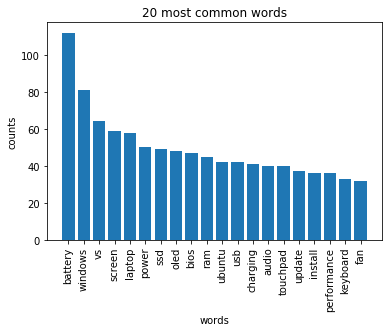

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = zip(words, total_counts)
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts, align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('20 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words

from sklearn.feature_extraction import text 

stopwordslist = ['8950', '9300','9520','9720', '9315', '9310', '9320','9710', '9510', '9305', '11', '3050', '2022', '17', '13', '15', 'helpxps', 'helpxps13', 'dell', 'xps', 'i7', 'help', 'i9', 'life', 'just', 'question', 'work', 'anybody', 'discussionis', 'discussionxps', 'helpdell', 'discussiondell', 'buy', '3rd', 'issue', 'issues', 'does', 'another', 'got', 'new', 'still', 'will', 'apple', 'across','plus', 'w', 'c', 'pd', 'news', 'known', 'xps13']
stop_words = text.ENGLISH_STOP_WORDS.union(stopwordslist)

count_vectorizer = CountVectorizer(stop_words=stop_words)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['title'])

# Visualise the 10 most common words
plot_20_most_common_words(count_data, count_vectorizer)

In [13]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % (topic_idx+1))
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 3

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #1:
ram upgrade white

Topic #2:
trackpad linux questions

Topic #3:
audio usb laptop

Topic #4:
touchpad battery ssd

Topic #5:
ssd usb fhd

Topic #6:
battery gpu rtx

Topic #7:
windows install bios

Topic #8:
ubuntu fan oled

Topic #9:
vs screen charging

Topic #10:
laptop battery windows


# NLP

In [24]:
# Set seed for reproducibility
import random; random.seed(53)

# Import all we need from sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import metrics

In [25]:
import pandas as pd

# Load data
df = pd.read_csv('reddit (label xps) all.csv')

df = df.dropna(axis=0)

# combined only list
df['combined'] = df['title'] + ' ' + df['content']

# Create target
y = df['label']
df

,counter,post date,model,source,label,number of likes,number of comments,title,content,link,combined
0,1,2023-01-11,xps 17 9710,dellxps - reddit,question (technical),1,0,dell xps 17 9710 (i7 11800h | 32gb ram | rtx30...,"hello everyone, i purchased an xps 17 9710 in ...",https://www.reddit.com/r/DellXPS/comments/108s...,dell xps 17 9710 (i7 11800h | 32gb ram | rtx30...
1,2,2023-01-11,xps 17 9710,dell - reddit,question (technical),1,0,discussiondell xps 17 9710 (i7 11800h | 32gb r...,"hello everyone, i purchased an xps 17 9710 in ...",https://www.reddit.com/r/Dell/comments/108s48j...,discussiondell xps 17 9710 (i7 11800h | 32gb r...
2,3,2023-01-10,xps 8960,xps - reddit,question (technical),1,0,"evidently, the dell xps 8960 will have certain...",dell has not as yet announced the follow-on to...,https://www.reddit.com/r/XPS/comments/108mcgo/...,"evidently, the dell xps 8960 will have certain..."
3,4,2023-01-10,xps 15 9520,dellxps - reddit,question (technical),2,2,anyone else having issues with a brand new xps...,i am trying to use whatever resources that are...,https://www.reddit.com/r/DellXPS/comments/108m...,anyone else having issues with a brand new xps...
4,5,2023-01-10,xps 15 9510,dellxps - reddit,question (purchasing),1,2,thinking about adding storage to my xps 9510 w...,anything with nvme and the largest size you ca...,https://www.reddit.com/r/DellXPS/comments/108i...,thinking about adding storage to my xps 9510 w...
5,6,2023-01-10,xps 15 9520,dellxps - reddit,question (technical),0,20,i am choosing between dell xps 15 9520 and asu...,view poll,https://www.reddit.com/r/DellXPS/comments/1080...,i am choosing between dell xps 15 9520 and asu...
6,7,2023-01-09,xps 13 plus 9320,dellxps - reddit,question (technical),7,6,xps 9320 plus & razer core x = great combo,"hey everyone, this is a pretty niche use-case ...",https://www.reddit.com/r/DellXPS/comments/107k...,xps 9320 plus & razer core x = great combo hey...
7,8,2023-01-09,xps 15 9520,dellxps - reddit,question (purchasing),2,7,dell xps 15 9520. ports and portability,could i seek any opinions from owners of the 2...,https://www.reddit.com/r/DellXPS/comments/1078...,dell xps 15 9520. ports and portability could ...
8,9,2023-01-09,xps 8950,dellxps - reddit,question (technical),1,4,i found this xps8950 on the side of the road. ...,tldr: what kind of cpu socket is in this? what...,https://www.reddit.com/r/DellXPS/comments/1075...,i found this xps8950 on the side of the road. ...
9,10,2023-01-09,xps 13 plus 9320,dellxps - reddit,question (technical),1,4,xps 13 plus external display support — 6k / 8k?,"i‘m looking at picking up an xps 13 plus, and ...",https://www.reddit.com/r/DellXPS/comments/1075...,xps 13 plus external display support — 6k / 8k...


In [26]:
nltk.download('stopwords')

stopwordslist = ["helpxps", "dell", "xps", '13', '15', '17', '2','3', '0', '1', '8950', 'vs', '3050', '11', 'm1', 'i7','ram','ssd','support',
                 '9305', '9310', '9320', '9510', '9520', '9710', '9720', 'running', 'first', 'update', 'able', 'well', 'getting', 'plus', 'performance','discussionxps', 'helpdell', 'discussiondell',
                 'would', 'around', 'used','find', 'run', 'else', 'machine', 'see', 'gen', 'working','going', 'anything', 'model', 'also', 'know', 'work', 'anyone', 'one', 'tried', 'problem', 'need', 'could', 'use', 'intel','4k',
                 'get', 'something', 'better', 'help', 'using', 'really', 'like', 'thanks', 'time', 'buy', '3rd', 'laptop', 'back', 'even','two',
                 '4', '5', 'com','hi', 'good', 'however', 'seems', 'sure', 'go', 'lot', 'pro', '10', 'fine', 'bought', 
                 'right', 'much', 'looking', 'think', '32gb','life', 'want', 'every','https', 'since', 'issue', 'issues',
                 'another', 'got', 'new','still', 'will', 'apple', 'across', 'w', 'c', 'pd', 'news', 'known', 'xps13']

# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

sw.extend(stopwordslist)

# Printing out the first eight stop words
print(sw[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xup641284\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# lemmatization
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df_data = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['combined'].iloc[i])
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in sw]
    review = ' '.join(review)
    df_data.append(review)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\xup641284\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xup641284\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
# Split training and testing data, choose between the combined only or lemmatization
X_train, X_test, y_train, y_test = train_test_split(df_data, y, random_state=0, test_size=0.2, stratify = y)

In [29]:
# Initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words=sw, max_df=0.3, min_df=0.001)

# Create count train and test variables
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=sw, max_df=0.3, min_df=0.001)

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Naive Bayes

In [30]:
# TF-IDF Gridsearch
params = {'alpha': [0.001, 0.01, 0.1, 1, 10],
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, cv=5, verbose=5)
multinomial_nb_grid.fit(tfidf_train,y_train)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(tfidf_train,y_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(tfidf_test,y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ....................................alpha=0.001; total time=   0.0s
[CV 2/5] END ....................................alpha=0.001; total time=   0.0s
[CV 3/5] END ....................................alpha=0.001; total time=   0.0s
[CV 4/5] END ....................................alpha=0.001; total time=   0.0s
[CV 5/5] END ....................................alpha=0.001; total time=   0.0s
[CV 1/5] END .....................................alpha=0.01; total time=   0.0s
[CV 2/5] END .....................................alpha=0.01; total time=   0.0s
[CV 3/5] END .....................................alpha=0.01; total time=   0.0s
[CV 4/5] END .....................................alpha=0.01; total time=   0.0s
[CV 5/5] END .....................................alpha=0.01; total time=   0.0s
[CV 1/5] END ......................................alpha=0.1; total time=   0.0s
[CV 2/5] END ....................................

In [31]:
# count Gridsearch
params = {'alpha': [0.001, 0.01, 0.1, 1, 10],
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, cv=5, verbose=5)
multinomial_nb_grid.fit(count_train,y_train)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(count_train,y_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(count_test,y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ....................................alpha=0.001; total time=   0.0s
[CV 2/5] END ....................................alpha=0.001; total time=   0.0s
[CV 3/5] END ....................................alpha=0.001; total time=   0.0s
[CV 4/5] END ....................................alpha=0.001; total time=   0.0s
[CV 5/5] END ....................................alpha=0.001; total time=   0.0s
[CV 1/5] END .....................................alpha=0.01; total time=   0.0s
[CV 2/5] END .....................................alpha=0.01; total time=   0.0s
[CV 3/5] END .....................................alpha=0.01; total time=   0.0s
[CV 4/5] END .....................................alpha=0.01; total time=   0.0s
[CV 5/5] END .....................................alpha=0.01; total time=   0.0s
[CV 1/5] END ......................................alpha=0.1; total time=   0.0s
[CV 2/5] END ....................................

In [32]:
# Create a MulitnomialNB model
tfidf_nb = MultinomialNB(alpha = 0.1)
tfidf_nb.fit(tfidf_train, y_train)

# Run predict on your TF-IDF test data to get your predictions
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)

# Calculate the accuracy of your predictions
tfidf_nb_score = metrics.accuracy_score(tfidf_nb_pred, y_test)

# Create a MulitnomialNB model
count_nb = MultinomialNB(alpha=0.01)
count_nb.fit(count_train, y_train)

# Run predict on your count test data to get your predictions
count_nb_pred = count_nb.predict(count_test)

# Calculate the accuracy of your predictions
count_nb_score = metrics.accuracy_score(count_nb_pred, y_test)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)
print('NaiveBayes Count Score: ', count_nb_score)

NaiveBayes Tfidf Score:  0.8111111111111111
NaiveBayes Count Score:  0.8


## TF-IDF

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tfidf_nb_pred))

                       precision    recall  f1-score   support

              dislike       0.00      0.00      0.00        13
                 like       0.00      0.00      0.00         4
question (operations)       1.00      0.17      0.29        12
question (purchasing)       0.68      0.52      0.59        61
 question (technical)       0.83      0.96      0.89       270

             accuracy                           0.81       360
            macro avg       0.50      0.33      0.35       360
         weighted avg       0.77      0.81      0.78       360



C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   2   0   0]
 [  0   0   3  32  12]
 [ 13   4   7  29 258]]


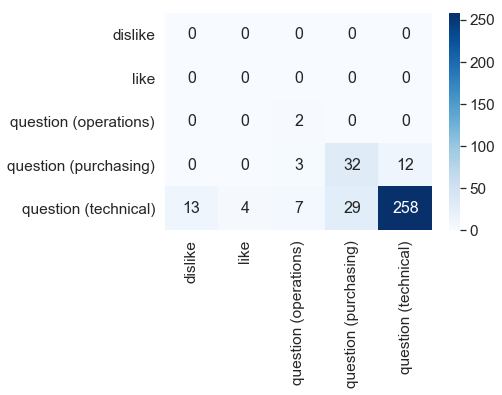

In [34]:
cm=metrics.confusion_matrix(tfidf_nb_pred, y_test)
print(cm)
cm = pd.DataFrame(cm, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, cmap="Blues",  annot_kws={"size": 16}, fmt='g') # font size

plt.show()

## CountVectorizer

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, count_nb_pred))

                       precision    recall  f1-score   support

              dislike       0.50      0.15      0.24        13
                 like       0.00      0.00      0.00         4
question (operations)       1.00      0.25      0.40        12
question (purchasing)       0.58      0.64      0.61        61
 question (technical)       0.85      0.90      0.88       270

             accuracy                           0.80       360
            macro avg       0.59      0.39      0.42       360
         weighted avg       0.79      0.80      0.78       360



C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  2   0   0   0   2]
 [  0   0   0   0   0]
 [  0   0   3   0   0]
 [  0   1   3  39  24]
 [ 11   3   6  22 244]]


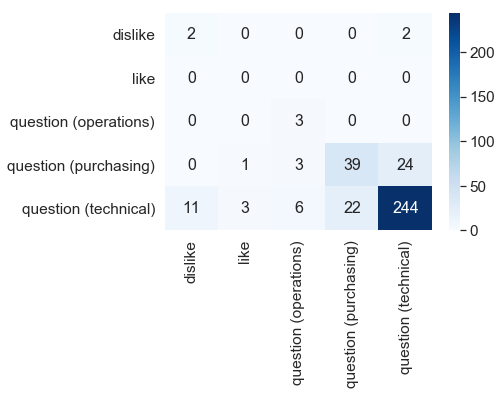

In [36]:
cm=metrics.confusion_matrix(count_nb_pred, y_test)
print(cm)
cm = pd.DataFrame(cm, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, cmap="Blues",  annot_kws={"size": 16}, fmt='g') # font size

plt.show()

# Linear SVM

In [37]:
# TF-IDF Gridsearch
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
         }

linearsvc_grid = GridSearchCV(LinearSVC(), param_grid=params, cv=5, verbose=5)
linearsvc_grid.fit(tfidf_train,y_train)

print('Train Accuracy : %.3f'%linearsvc_grid.best_estimator_.score(tfidf_train,y_train))
print('Test Accuracy : %.3f'%linearsvc_grid.best_estimator_.score(tfidf_test,y_test))
print('Best Accuracy Through Grid Search : %.3f'%linearsvc_grid.best_score_)
print('Best Parameters : ',linearsvc_grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ........................................C=0.001; total time=   0.0s
[CV 2/5] END ........................................C=0.001; total time=   0.0s
[CV 3/5] END ........................................C=0.001; total time=   0.0s
[CV 4/5] END ........................................C=0.001; total time=   0.0s
[CV 5/5] END ........................................C=0.001; total time=   0.0s
[CV 1/5] END .........................................C=0.01; total time=   0.0s
[CV 2/5] END .........................................C=0.01; total time=   0.0s
[CV 3/5] END .........................................C=0.01; total time=   0.0s
[CV 4/5] END .........................................C=0.01; total time=   0.0s
[CV 5/5] END .........................................C=0.01; total time=   0.0s
[CV 1/5] END ..........................................C=0.1; total time=   0.0s
[CV 2/5] END ....................................

C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 1/5] END ..........................................C=100; total time=   0.3s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 2/5] END ..........................................C=100; total time=   0.4s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 3/5] END ..........................................C=100; total time=   0.4s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 4/5] END ..........................................C=100; total time=   0.3s
[CV 5/5] END ..........................................C=100; total time=   0.3s
Train Accuracy : 0.995
Test Accuracy : 0.822
Best Accuracy Through Grid Search : 0.818
Best Parameters :  {'C': 1}


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
# count Gridsearch
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
         }

linearsvc_grid = GridSearchCV(LinearSVC(), param_grid=params, cv=5, verbose=5)
linearsvc_grid.fit(count_train,y_train)

print('Train Accuracy : %.3f'%linearsvc_grid.best_estimator_.score(count_train,y_train))
print('Test Accuracy : %.3f'%linearsvc_grid.best_estimator_.score(count_test,y_test))
print('Best Accuracy Through Grid Search : %.3f'%linearsvc_grid.best_score_)
print('Best Parameters : ',linearsvc_grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ........................................C=0.001; total time=   0.0s
[CV 2/5] END ........................................C=0.001; total time=   0.0s
[CV 3/5] END ........................................C=0.001; total time=   0.0s
[CV 4/5] END ........................................C=0.001; total time=   0.0s
[CV 5/5] END ........................................C=0.001; total time=   0.0s
[CV 1/5] END .........................................C=0.01; total time=   0.0s
[CV 2/5] END .........................................C=0.01; total time=   0.0s
[CV 3/5] END .........................................C=0.01; total time=   0.0s
[CV 4/5] END .........................................C=0.01; total time=   0.0s
[CV 5/5] END .........................................C=0.01; total time=   0.0s
[CV 1/5] END ..........................................C=0.1; total time=   0.1s
[CV 2/5] END ....................................

C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 1/5] END ............................................C=1; total time=   0.2s
[CV 2/5] END ............................................C=1; total time=   0.1s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 3/5] END ............................................C=1; total time=   0.1s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 4/5] END ............................................C=1; total time=   0.1s
[CV 5/5] END ............................................C=1; total time=   0.1s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 1/5] END ...........................................C=10; total time=   0.2s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 2/5] END ...........................................C=10; total time=   0.2s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 3/5] END ...........................................C=10; total time=   0.2s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 4/5] END ...........................................C=10; total time=   0.2s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 5/5] END ...........................................C=10; total time=   0.2s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 1/5] END ..........................................C=100; total time=   0.3s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 2/5] END ..........................................C=100; total time=   0.3s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 3/5] END ..........................................C=100; total time=   0.3s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 4/5] END ..........................................C=100; total time=   0.1s


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV 5/5] END ..........................................C=100; total time=   0.1s
Train Accuracy : 0.994
Test Accuracy : 0.808
Best Accuracy Through Grid Search : 0.803
Best Parameters :  {'C': 0.1}


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
# Create a LinearSVM model
tfidf_svc = LinearSVC(C=1)
tfidf_svc.fit(tfidf_train, y_train)

# Run predict on your tfidf test data to get your predictions
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)

# Calculate your accuracy using the metrics module
tfidf_svc_score = metrics.accuracy_score(tfidf_svc_pred, y_test)


print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

LinearSVC Score:   0.822


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tfidf_svc_pred))

                       precision    recall  f1-score   support

              dislike       1.00      0.15      0.27        13
                 like       0.00      0.00      0.00         4
question (operations)       1.00      0.17      0.29        12
question (purchasing)       0.71      0.56      0.62        61
 question (technical)       0.84      0.96      0.89       270

             accuracy                           0.82       360
            macro avg       0.71      0.37      0.41       360
         weighted avg       0.82      0.82      0.79       360



C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  2   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   2   0   0]
 [  0   1   1  34  12]
 [ 11   3   9  27 258]]


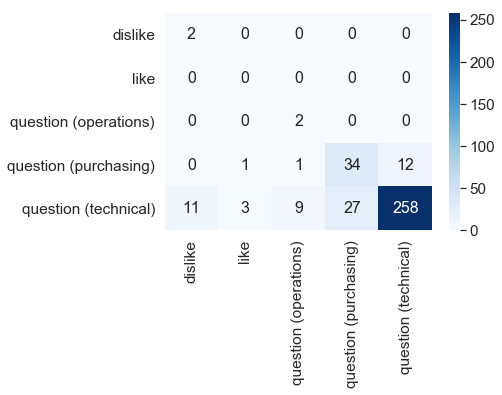

In [41]:
cm=metrics.confusion_matrix(tfidf_svc_pred, y_test)
print(cm)
cm = pd.DataFrame(cm, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, cmap="Blues",  annot_kws={"size": 16}, fmt='g') # font size

plt.show()

In [42]:
# Create a LinearSVM model
count_svc = LinearSVC(C=0.1)
count_svc.fit(count_train, y_train)

# Run predict on your tfidf test data to get your predictions
count_svc_pred = count_svc.predict(count_test)

# Calculate your accuracy using the metrics module
count_svc_score = metrics.accuracy_score(count_svc_pred, y_test)


print("LinearSVC Score:   %0.3f" % count_svc_score)

LinearSVC Score:   0.808


C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[  3   0   0   0   4]
 [  0   0   0   0   0]
 [  0   0   3   1   1]
 [  1   1   2  37  17]
 [  9   3   7  23 248]]


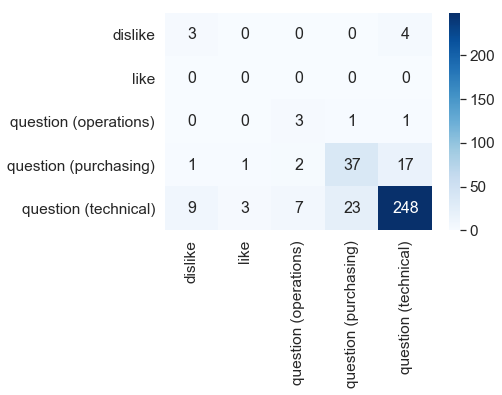

In [43]:
cm=metrics.confusion_matrix(count_svc_pred, y_test)
print(cm)
cm = pd.DataFrame(cm, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, cmap="Blues",  annot_kws={"size": 16}, fmt='g') # font size

plt.show()

# XGBoost

In [180]:
df = pd.read_csv('reddit (label xps) all.csv')

df = df.dropna(axis=0)

# combined only list
df['combined'] = df['title'] + ' ' + df['content']

# Create target
y = df['label']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(df_data, y, random_state=0, test_size=0.2, stratify = y)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [182]:
# Initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words=sw, max_df=0.3, min_df=0.001)

# Create count train and test variables
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=sw, max_df=0.3, min_df=0.001)

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [183]:
# tfidf Gridsearch
params = {
        'colsample_bytree': [0.3, 0.6, 0.8, 1.0],
        'reg_alpha': [0, 0.5, 1, 5],
        'reg_lambda': [0, 0.5, 1, 5]
        }

xgboost_grid = GridSearchCV(XGBClassifier(), param_grid=params, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
xgboost_grid.fit(tfidf_train,y_train)

print('Train Accuracy : %.3f'%xgboost_grid.best_estimator_.score(tfidf_train,y_train))
print('Test Accuracy : %.3f'%xgboost_grid.best_estimator_.score(tfidf_test,y_test))
print('Best Accuracy Through Grid Search : %.3f'%xgboost_grid.best_score_)
print('Best Parameters : ',xgboost_grid.best_params_)

Train Accuracy : 0.993
Test Accuracy : 0.806
Best Accuracy Through Grid Search : 0.801
Best Parameters :  {'colsample_bytree': 0.3, 'reg_alpha': 0, 'reg_lambda': 1}


In [184]:
# count Gridsearch
params = {
        'colsample_bytree': [0.3, 0.6, 0.8, 1.0],
        'reg_alpha': [0, 0.5, 1, 5],
        'reg_lambda': [0, 0.5, 1, 5]
        }

xgboost_grid = GridSearchCV(XGBClassifier(), param_grid=params, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
xgboost_grid.fit(count_train,y_train)

print('Train Accuracy : %.3f'%xgboost_grid.best_estimator_.score(count_train,y_train))
print('Test Accuracy : %.3f'%xgboost_grid.best_estimator_.score(count_test,y_test))
print('Best Accuracy Through Grid Search : %.3f'%xgboost_grid.best_score_)
print('Best Parameters : ',xgboost_grid.best_params_)

Train Accuracy : 0.987
Test Accuracy : 0.794
Best Accuracy Through Grid Search : 0.806
Best Parameters :  {'colsample_bytree': 0.3, 'reg_alpha': 0, 'reg_lambda': 0.5}


In [190]:
from xgboost import XGBClassifier

# Create a MulitnomialNB model
tfidf_xgt = XGBClassifier(colsample_bytree = 0.3, reg_alpha = 0, reg_lambda = 1, subsample = 1, min_child_weight = 1)
tfidf_xgt.fit(tfidf_train, y_train)

# Run predict on your TF-IDF test data to get your predictions
tfidf_xgt_pred = tfidf_xgt.predict(tfidf_test)

# Calculate the accuracy of your predictions
tfidf_xgt_score = metrics.accuracy_score(tfidf_xgt_pred, y_test)

# Create a MulitnomialNB model
count_xgt = XGBClassifier(colsample_bytree = 0.3, reg_alpha = 0, reg_lambda = 0, subsample=1.0, min_child_weight = 1)
count_xgt.fit(count_train, y_train)

# Run predict on your count test data to get your predictions
count_xgt_pred = count_xgt.predict(count_test)

# Calculate the accuracy of your predictions
count_xgt_score = metrics.accuracy_score(count_xgt_pred, y_test)

print('XGboost Tfidf Score: ', tfidf_xgt_score)
print('XGboost Count Score: ', count_xgt_score)

XGboost Tfidf Score:  0.8055555555555556
XGboost Count Score:  0.8027777777777778


# LSTM

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import time
from collections import Counter

In [46]:
# Load data
df = pd.read_csv('reddit (label xps) all.csv')

df = df.dropna(axis=0)

# combined only list
df['combined'] = df['title'] + ' ' + df['content']

# Create target
y_label = df['label']

In [47]:
y = pd.get_dummies(y_label).values
name = pd.get_dummies(y_label)
#get column names that were not in the original dataframe
new_cols = name.columns[~name.columns.isin(df.columns)]
print('Shape of label tensor:', y.shape)
print(new_cols)

Shape of label tensor: (1800, 5)
Index(['dislike', 'like', 'question (operations)', 'question (purchasing)',
       'question (technical)'],
      dtype='object')


In [48]:
nltk.download('stopwords')

stopwordslist = ["helpxps", "dell", "xps", '13', '15', '17', '2','3', '0', '1', '8950', '8950,', '..', 'x.', 'vs', '(9320)', '9320?', '-', ':', '3050', '11', 'm1', 'i7','ram','ssd','support',
                 '9305', '9310', '9320', '9510', '9520', '9710', '9720', '9720.', '9315', '9315 ', 'plus', '3060', 'running', 'high', 'review','sometimes', 'update', 'able', 'well', 'getting', 'plus', 'performance','discussionxps', 'helpdell', 'discussiondell',
                 'would', 'dont', 'find', 'run', 'else', 'machine', 'see', 'gen', 'working', 'cant', 'going', 'anything', 'model', 'also', 'know', 'work', 'anyone', 'one', 'tried', 'problem', 'need', 'could', 'use', 'intel','4k',
                 'get', 'something', 'better', 'help', 'using', 'really', 'like', 'thanks', 'time', 'buy', '3rd', 'laptop', 'back', 'even','two',
                 '4', '5', 'com','hi', 'good', 'however', 'seems', 'sure', 'go', 'lot', 'pro', '10', 'fine', 'bought', 
                 'right', 'much', 'looking', 'think', '32gb','life', 'want', 'every','https', 'since', 'issue', 'issues',
                 'another', 'got', 'new','still', 'will', 'apple', 'across', 'w', 'c', 'pd', 'news', 'known', 'xps13']

# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

sw.extend(stopwordslist)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xup641284\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
from collections import Counter
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            word = re.sub('[^a-zA-Z]', ' ',word)
            word = word.strip().replace(' ', '')
            if word not in sw:
                count[word.strip().replace(' ', '')] += 1
    return count

text_values = df['combined']

counter = counter_word(text_values)
list(counter.items())[:10]

[('', 10396),
 ('h', 107),
 ('gb', 533),
 ('rtx', 128),
 ('bios', 352),
 ('changing', 31),
 ('setting', 90),
 ('amber', 16),
 ('lights', 12),
 ('white', 84)]

In [50]:
# lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df_data = []
for i in range(0, len(text_values)):
    review = re.sub('[^a-zA-Z]', ' ', text_values.iloc[i])
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in sw]
    review = ' '.join(review)
    df_data.append(review)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xup641284\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
# sparse matrix
#df = pd.DataFrame([counter.keys(), counter.values()], index = ['word','count']).T
#df = df.pivot(columns = 'word', values = 'count').fillna(0)
#df

In [52]:
# The maximum number of words to be used. (most frequent)
vocab_size = len(counter)

# This is fixed
embedding_dim = 32

# Max number of words in each complaint
max_length = 20

tokenizer = Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}z~', lower=True)
tokenizer.fit_on_texts(df['combined'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 10570 unique tokens.


In [53]:
X = tokenizer.texts_to_sequences(df_data)
X = pad_sequences(X, maxlen=max_length)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1800, 20)


In [54]:
y = pd.get_dummies(y_label).values
print('Shape of label tensor:', y.shape)
np.unique(y_label)

Shape of label tensor: (1800, 5)


array(['dislike', 'like', 'question (operations)',
       'question (purchasing)', 'question (technical)'], dtype=object)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1440, 20) (1440, 5)
(360, 20) (360, 5)


In [56]:
# Model Definition with LSTM

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences = True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='softmax'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            288416    
                                                                 
 spatial_dropout1d (SpatialD  (None, 20, 32)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 20, 32)            8320      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                        

In [57]:
epochs = 40
batch_size = 64

history = model.fit(X_train, y_train, 
                    epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/40
18/18 [==============================] - 8s 117ms/step - loss: 1.6091 - accuracy: 0.0425 - val_loss: 1.5725 - val_accuracy: 0.7014
Epoch 2/40
18/18 [==============================] - 1s 40ms/step - loss: 1.5011 - accuracy: 0.7691 - val_loss: 1.4531 - val_accuracy: 0.7014
Epoch 3/40
18/18 [==============================] - 1s 42ms/step - loss: 1.3825 - accuracy: 0.7691 - val_loss: 1.3596 - val_accuracy: 0.7014
Epoch 4/40
18/18 [==============================] - 1s 47ms/step - loss: 1.2862 - accuracy: 0.7691 - val_loss: 1.2978 - val_accuracy: 0.7014
Epoch 5/40
18/18 [==============================] - 1s 51ms/step - loss: 1.2281 - accuracy: 0.7691 - val_loss: 1.2534 - val_accuracy: 0.7014
Epoch 6/40
18/18 [==============================] - 1s 38ms/step - loss: 1.1832 - accuracy: 0.7691 - val_loss: 1.2115 - val_accuracy: 0.7014
Epoch 7/40
18/18 [==============================] - 1s 37ms/step - loss: 1.1423 - accuracy: 0.7691 - val_loss: 1.1739 - val_accuracy: 0.7014
Epoch 8/40
1

In [58]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

12/12 [==============================] - 0s 6ms/step - loss: 0.8523 - accuracy: 0.7250
Test set
  Loss: 0.852
  Accuracy: 0.725


In [59]:
list(new_cols)

['dislike',
 'like',
 'question (operations)',
 'question (purchasing)',
 'question (technical)']

In [60]:
labels = list(new_cols)
prediction = model.predict(X_test) 
classes = np.argmax(prediction,axis=1)
print(classes[:10])

prediction_list = []
for i in classes:
    prediction_list.append(labels[i])
prediction_list[:10]

[4 4 4 4 4 4 4 4 4 4]


['question (technical)',
 'question (technical)',
 'question (technical)',
 'question (technical)',
 'question (technical)',
 'question (technical)',
 'question (technical)',
 'question (technical)',
 'question (technical)',
 'question (technical)']

In [61]:
y_test_classes = np.argmax(y_test,axis=1)
print(y_test_classes)

y_test_list = []
for i in y_test_classes:
    y_test_list.append(labels[i])
y_test_list[:10]

[4 4 4 4 4 3 4 4 4 3 3 1 4 4 4 4 4 3 4 4 4 4 4 3 4 4 0 4 4 3 3 4 4 4 3 4 3
 4 4 4 3 4 4 4 4 4 4 3 4 4 4 4 3 4 4 4 4 4 1 4 4 3 4 4 4 4 4 4 2 2 4 3 3 3
 4 3 4 3 3 4 4 4 4 3 4 4 4 4 4 0 4 4 4 3 4 4 4 4 4 4 3 3 3 4 4 4 4 3 4 4 3
 4 3 0 4 4 4 4 4 4 4 4 4 4 3 4 4 4 3 0 2 4 3 0 0 4 4 3 4 4 4 4 4 4 4 3 4 4
 3 3 3 4 4 4 4 4 4 4 4 3 4 4 3 4 4 4 4 2 4 4 3 4 3 4 4 4 4 4 4 4 4 4 3 3 3
 3 4 3 2 4 4 4 4 2 4 4 4 4 3 4 0 4 4 4 3 4 4 3 4 0 4 4 4 2 4 4 4 4 4 4 3 4
 4 4 3 4 3 4 4 4 3 4 4 4 4 4 4 3 4 3 4 4 4 4 4 4 4 4 4 4 4 2 4 3 4 4 4 3 3
 4 4 4 4 3 3 4 4 4 4 4 4 4 4 4 3 4 3 4 3 3 4 4 4 4 4 4 4 4 4 4 4 3 4 4 3 4
 4 3 4 3 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 1 4 4 4 4 2 4 3 4 2
 4 4 4 4 4 4 3 3 4 3 4 4 4 4 4 3 4 3 0 4 4 3 2 3 4 4 4]


['question (technical)',
 'question (technical)',
 'question (technical)',
 'question (technical)',
 'question (technical)',
 'question (purchasing)',
 'question (technical)',
 'question (technical)',
 'question (technical)',
 'question (purchasing)']

In [62]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test_list, prediction_list))

                       precision    recall  f1-score   support

              dislike       0.00      0.00      0.00         9
                 like       0.00      0.00      0.00         3
question (operations)       0.00      0.00      0.00        11
question (purchasing)       0.00      0.00      0.00        76
 question (technical)       0.72      1.00      0.84       261

             accuracy                           0.73       360
            macro avg       0.14      0.20      0.17       360
         weighted avg       0.53      0.72      0.61       360



C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xup641284\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


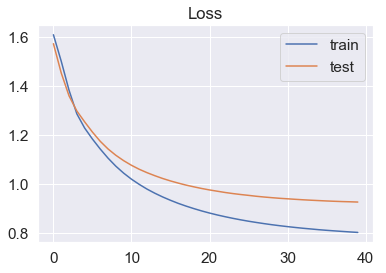

In [63]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

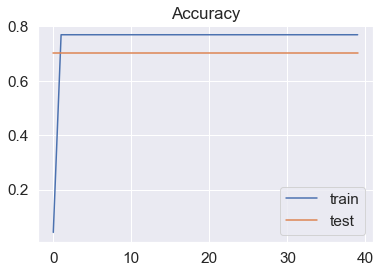

In [64]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [65]:
model_loss = pd.DataFrame(history.history)
model_loss.head(10)

,loss,accuracy,val_loss,val_accuracy
0,1.609139,0.042535,1.572508,0.701389
1,1.501092,0.769097,1.453084,0.701389
2,1.382534,0.769097,1.359634,0.701389
3,1.286186,0.769097,1.297780,0.701389
4,1.228083,0.769097,1.253396,0.701389
5,1.183155,0.769097,1.211481,0.701389
6,1.142312,0.769097,1.173867,0.701389
7,1.105040,0.769097,1.142595,0.701389
8,1.072171,0.769097,1.116758,0.701389
9,1.043849,0.769097,1.094809,0.701389


In [66]:
df['combined'][0]

'dell xps 17 9710 (i7 11800h | 32gb ram | rtx3050) - bios issue when changing a setting 2 amber lights, 8 white lights "display failure - ec detection of power rail failure". hello everyone, i purchased an xps 17 9710 in january 2020 and just after 1 week of use i entered the uefi bios (version 1.6.0) and changed some settings, nothing serious just the keyboard backlight and battery settings. after restart, the pc won´t pass dell logo (no post) as dell call it. and the status light in the front of the laptop flashed 2 times amber and 8 times white. started to research on it and found out that according to dell "display failure - ec detection of power rail failure". dell support team troubleshooted the device and then advice for a motherboard replacement due to the that power rail failure. a month later i received my device and entered bios... i was in real disbelief when again the same happened, and again the motherboard was replaced. after the second replacement i updated the uefi bio

In [67]:
new_complaint = [df['combined'][0]]
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = list(new_cols)
print(pred, labels[np.argmax(pred)])

[[0.04967488 0.0374717  0.06599405 0.13943784 0.7074216 ]] question (technical)


# Keywords

In [68]:
import pandas as pd

# Load data
df = pd.read_csv('reddit (label xps) all.csv')

df = df.dropna(axis=0)

# combined only list
df['context'] = df['title'] + ' ' + df['content']

df = df.drop(['source', 'number of likes', 'number of comments', 'title', 'content', 'link'], axis =1)

df.head()

,counter,post date,model,label,context
0,1,2023-01-11,xps 17 9710,question (technical),dell xps 17 9710 (i7 11800h | 32gb ram | rtx30...
1,2,2023-01-11,xps 17 9710,question (technical),discussiondell xps 17 9710 (i7 11800h | 32gb r...
2,3,2023-01-10,xps 8960,question (technical),"evidently, the dell xps 8960 will have certain..."
3,4,2023-01-10,xps 15 9520,question (technical),anyone else having issues with a brand new xps...
4,5,2023-01-10,xps 15 9510,question (purchasing),thinking about adding storage to my xps 9510 w...


In [69]:
# lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# remove stop words
df_nosw = []
for i in range(0, len(df['context'])):
    review = re.sub('[^a-zA-Z0-9]', ' ', df['context'].iloc[i])
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)
    df_nosw.append(review)

df['context'] = df_nosw
df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xup641284\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,counter,post date,model,label,context
0,1,2023-01-11,xps 17 9710,question (technical),dell xps 17 9710 i7 11800h 32gb ram rtx3050 bi...
1,2,2023-01-11,xps 17 9710,question (technical),discussiondell xps 17 9710 i7 11800h 32gb ram ...
2,3,2023-01-10,xps 8960,question (technical),evidently the dell xps 8960 will have certain ...
3,4,2023-01-10,xps 15 9520,question (technical),anyone else having issue with a brand new xps ...
4,5,2023-01-10,xps 15 9510,question (purchasing),thinking about adding storage to my xps 9510 w...
5,6,2023-01-10,xps 15 9520,question (technical),i am choosing between dell xps 15 9520 and asu...
6,7,2023-01-09,xps 13 plus 9320,question (technical),xps 9320 plus razer core x great combo hey eve...
7,8,2023-01-09,xps 15 9520,question (purchasing),dell xps 15 9520 port and portability could i ...
8,9,2023-01-09,xps 8950,question (technical),i found this xps8950 on the side of the road w...
9,10,2023-01-09,xps 13 plus 9320,question (technical),xps 13 plus external display support 6k 8k i m...


In [70]:
keywords = ['keyboard', 'trackpad', 'audio', 'speaker', 'camera', 'webcam', 'crash', 'track pad', 'freeze', 'display', 'lcd', 
            'graphic', 'vmware', 'disappointing', 'oled', 'unresponsive', 'hinge', 'touchpad', 'thunderbolt', 'port', 'bad', 'configuration', 'backlit', 'ram', 'fps',  'video', 'cover',
            'discontinued', 'recalled', 'selling', 'usb', 'driver', 'drives', 'linux', 'boot', 'hot', 'battery', 'stuttering', 'purchasing',
            'stuck', 'frustrating', 'logo', 'mother board', 'motherboard', 'fail', 'sunk', 'sink', 'corner', 'bios', 'firmware', 'kb',
            'review' , 'ssd', 'install', 'resolution', 'wifi', 'slow', 'terrible', 'ubuntu', 'monitor', 'adapter', 
            'shipped', 'shipment', 'ship', 'error', 'sunk', 'sink', 'corner', 'bios', 'firmware', 'refurbished', 'repair', 'repaired', 
            'charger', 'fan', 'charging', 'charge', 'air', 'cooling', 'disappointed', 'rattle', 'rattling', 'noise', 'buy', 
            'heat', 'power', 'released','release', 'volume', 'drain', 'missing', 'recall', 'remove', 'doubt', 'gpu', 'dock', 'wobble', 'break', 'touch pen', 
            'trouble', 'switch', 'overheat', 'cost', 'play', 'pleasant', 'support', 'search', 'disk', 'consider', 'cursor', 'fingerprint', 'overheating', 'throttling', 'throttle', 'thermal', 'warranty', 'flicker', 'against', 'tearing', 'haptic', 'suck', 'hibernate', 'undervolting', 'delay', 'awful', 'hardcase', 'touch', 'disaster', 'driver', 'popping', 'button', 'chassis', 'cracking', 
            'lid', 'atrocious', 'gorgeous', 'impressed', 'service','decal', 'recommendation', 'fps', 'case', 'pixel', 'purchase', 'option', 'happy', 'satisfied', 'dislike', 'safeguard', 'garbage', 'window', 'shutting', 'underwhelmed', 'got', 'skin', 'looking', 'decide', 'recommend', 'difference', 'choosing', 'replace', 'glitch', 'shutdown', 'saturation', 'stain', 'run', 'order', 'molding', 'temp', 'color', 'oversaturated', 'love', 'store', 'complain','return', 'stuttering', 'microphone', 'desperation', 'headphone', 'buzzing', 'ridiculous', 'worse', 'screen', 'poor', 'low',
            'replacement', 'backlight', 'slot', 'compatibility', 'key', 'feedback', 'lagging', 'compare', 'egpu', 'horrible', 'cpu', 'bluetooth', 'dgpu', 'lag', 'retrospective','photo', 'stereo', 'dongle', 'sound']

In [71]:
df['keyword'] = df['context'].str.findall('|'.join(keywords)).apply(set).str.join(', ')
df.insert(4, 'keyword', df.pop('keyword'))
df

,counter,post date,model,label,keyword,context
0,1,2023-01-11,xps 17 9710,question (technical),"boot, replace, fail, purchase, firmware, keybo...",dell xps 17 9710 i7 11800h 32gb ram rtx3050 bi...
1,2,2023-01-11,xps 17 9710,question (technical),"boot, replace, fail, purchase, firmware, keybo...",discussiondell xps 17 9710 i7 11800h 32gb ram ...
2,3,2023-01-10,xps 8960,question (technical),"slot, decide, support, low, service",evidently the dell xps 8960 will have certain ...
3,4,2023-01-10,xps 15 9520,question (technical),"unresponsive, slow, support, window, crash, run",anyone else having issue with a brand new xps ...
4,5,2023-01-10,xps 15 9510,question (purchasing),"ssd, recommendation",thinking about adding storage to my xps 9510 w...
5,6,2023-01-10,xps 15 9520,question (technical),"battery, hot, choosing",i am choosing between dell xps 15 9520 and asu...
6,7,2023-01-09,xps 13 plus 9320,question (technical),"monitor, play, case, screen, ram, egpu, got, run",xps 9320 plus razer core x great combo hey eve...
7,8,2023-01-09,xps 15 9520,question (purchasing),"order, usb, dongle, port, oled, monitor, keybo...",dell xps 15 9520 port and portability could i ...
8,9,2023-01-09,xps 8950,question (technical),"buy, bios, keyboard, case, screen, power, conf...",i found this xps8950 on the side of the road w...
9,10,2023-01-09,xps 13 plus 9320,question (technical),"dock, usb, port, support, configuration, resol...",xps 13 plus external display support 6k 8k i m...


In [72]:
df['context'][0]

'dell xps 17 9710 i7 11800h 32gb ram rtx3050 bios issue when changing a setting 2 amber light 8 white light display failure ec detection of power rail failure hello everyone i purchased an xps 17 9710 in january 2020 and just after 1 week of use i entered the uefi bios version 1 6 0 and changed some setting nothing serious just the keyboard backlight and battery setting after restart the pc won t pas dell logo no post a dell call it and the status light in the front of the laptop flashed 2 time amber and 8 time white started to research on it and found out that according to dell display failure ec detection of power rail failure dell support team troubleshooted the device and then advice for a motherboard replacement due to the that power rail failure a month later i received my device and entered bios i wa in real disbelief when again the same happened and again the motherboard wa replaced after the second replacement i updated the uefi bios firmware to the latest version and a my war

In [73]:
df['keyword'][0]

'boot, replace, fail, purchase, firmware, keyboard, battery, screen, ram, warranty, trouble, backlight, bios, power, logo, run, search, support, motherboard, option, display'

# All prediction

In [74]:
import pandas as pd

# Load data
df = pd.concat(map(pd.read_csv, ['reddit (label inspiron).csv', 'reddit (label vostro).csv','reddit (label dellg15).csv','reddit (label xps) all.csv']))

df = df.dropna(axis=0)

# combined only list
df['combined'] = df['title'] + ' ' + df['content']

y = df['label']

df

,counter,post date,model,source,label,number of likes,number of comments,title,content,link,combined
0,1,2023-01-08,inspiron 16 5620,inspiron (dell) - reddit,question (technical),1,1,brand new inspiron 16 5620 touchpad stops work...,"as stated, brand new inspiron laptop received ...",https://www.reddit.com/r/Dell/comments/106svhi...,brand new inspiron 16 5620 touchpad stops work...
1,2,2022-12-31,inspiron 16 plus 7620,inspiron (dell) - reddit,question (technical),6,1,i can confirm the wd22tb4 works flawlessly wit...,"i am not sure why on the dell website, the doc...",https://www.reddit.com/r/Dell/comments/1000y12...,i can confirm the wd22tb4 works flawlessly wit...
2,3,2022-12-25,inspiron 16 plus 7620,inspiron (dell) - reddit,question (technical),1,4,dell inspiron 7620 memory,hi i noticed that the dell inspiron 7620 i7 12...,https://www.reddit.com/r/Dell/comments/zuwx0v/...,dell inspiron 7620 memory hi i noticed that th...
3,4,2022-12-17,inspiron 16 plus 7620,inspiron (dell) - reddit,question (technical),1,2,inspiron 7620 touchpad,"hey all, should have stuck with my theory of a...",https://www.reddit.com/r/Dell/comments/zogtwg/...,"inspiron 7620 touchpad hey all, should have st..."
4,5,2022-12-13,inspiron 16 plus 7620,inspiron (dell) - reddit,question (technical),2,1,dell inspiron 16 plus 7620 not recognizing,"hi, sorry if this issue has been solved elsewh...",https://www.reddit.com/r/Dell/comments/zkilk9/...,"dell inspiron 16 plus 7620 not recognizing hi,..."
5,6,2022-12-02,inspiron 16 plus 7620,inspiron (dell) - reddit,question (technical),0,4,inspiron 7620: noisy,"hi all, does anyone know why dell doesnt seem ...",https://www.reddit.com/r/Dell/comments/zakyei/...,"inspiron 7620: noisy hi all, does anyone know ..."
6,7,2022-11-27,inspiron 14 5425,inspiron (dell) - reddit,question (technical),1,1,dell inspiron 5425 wifi,i recently got a new dell inspiron 14 laptop w...,https://www.reddit.com/r/Dell/comments/z5zjbh/...,dell inspiron 5425 wifi i recently got a new d...
7,8,2022-11-26,inspiron 16 plus 7620,inspiron (dell) - reddit,question (technical),1,2,"inspiron 16 plus 7620: fan speed under ""normal...","hello dear forum community, above mentioned la...",https://www.reddit.com/r/Dell/comments/z54fng/...,"inspiron 16 plus 7620: fan speed under ""normal..."
8,9,2022-11-26,inspiron 16 plus 7620,inspiron (dell) - reddit,question (technical),1,2,how to check the chipset used for the inspiron...,"hello there, i tried to find out what chipset ...",https://www.reddit.com/r/Dell/comments/z4ydee/...,how to check the chipset used for the inspiron...
9,10,2022-11-23,inspiron 15 3525,inspiron (dell) - reddit,question (purchasing),1,1,which radeon processor in dell inspiron 15 352...,i am considering getting a dell inspiron 15 mo...,https://www.reddit.com/r/Dell/comments/z2z6v2/...,which radeon processor in dell inspiron 15 352...


In [75]:
nltk.download('stopwords')

stopwordslist = ["helpxps", "dell", "xps", '13', '15', '17', '2','3', '0', '1', '8950', 'vs', '3050', '11', 'm1', 'i7', 'ram','ssd','support',
                 '9305', '9310', '9320', '9510', '9520', '9710', '9720', 'running','first', 'inspiron', 'update', 'able', 'well', 'getting', 'plus', 'performance','discussionxps', 'helpdell', 'discussiondell',
                 'would', 'around', 'used','find', 'run', 'else', 'machine', 'see', 'gen', 'working','going', 'anything', 'model', 'also', 'know', 'work', 'anyone', 'one', 'tried', 'problem', 'need', 'could', 'use', 'intel','4k',
                 'get', 'something', 'better', 'help', 'using', 'really', 'like', 'thanks', 'time', 'buy', '3rd', 'laptop', 'back', 'even','two',
                 '4', '5', 'com','hi', 'good', 'however', 'seems', 'sure', 'go', 'lot', 'pro', '10', 'fine', 'bought', 
                 'right', 'much', 'looking', 'think', '32gb','life', 'want', 'every','https', 'since', 'issue', 'issues',
                 'another', 'got', 'new','still', 'will', 'apple', 'across', 'w', 'c', 'pd', 'news', 'known', 'xps13']

# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

sw.extend(stopwordslist)

# Printing out the first eight stop words
print(sw[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xup641284\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
# lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df_data = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['combined'].iloc[i])
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in sw]
    review = ' '.join(review)
    df_data.append(review)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xup641284\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [77]:
# Split training and testing data, choose between the combined only or lemmatization
X_train, X_test, y_train, y_test = train_test_split(df_data, y, random_state=0, test_size=0.2, stratify = y)

In [78]:
# Initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words=sw, max_df=0.3, min_df=0.001)

# Create count train and test variables
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=sw, max_df=0.3, min_df=0.001)

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [79]:
# Create a MulitnomialNB model
tfidf_nb = MultinomialNB(alpha = 0.1)
tfidf_nb.fit(tfidf_train, y_train)

# Run predict on your TF-IDF test data to get your predictions
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)

# Calculate the accuracy of your predictions
tfidf_nb_score = metrics.accuracy_score(tfidf_nb_pred, y_test)

# Create a MulitnomialNB model
count_nb = MultinomialNB(alpha=0.01)
count_nb.fit(count_train, y_train)

# Run predict on your count test data to get your predictions
count_nb_pred = count_nb.predict(count_test)

# Calculate the accuracy of your predictions
count_nb_score = metrics.accuracy_score(count_nb_pred, y_test)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)
print('NaiveBayes Count Score: ', count_nb_score)

NaiveBayes Tfidf Score:  0.8113207547169812
NaiveBayes Count Score:  0.8194070080862533


[[  1   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   2   0   1]
 [  1   0   2  31  10]
 [ 12   4   8  32 267]]


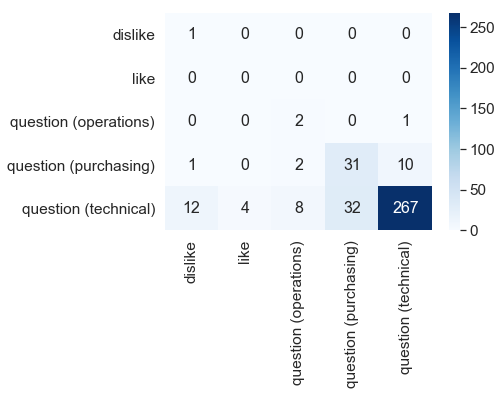

In [80]:
cm=metrics.confusion_matrix(tfidf_nb_pred, y_test)
print(cm)
cm = pd.DataFrame(cm, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, cmap="Blues",  annot_kws={"size": 16}, fmt='g') # font size

plt.show()

[[  3   0   0   0   2]
 [  0   0   0   0   0]
 [  0   0   4   0   1]
 [  1   0   2  38  16]
 [ 10   4   6  25 259]]


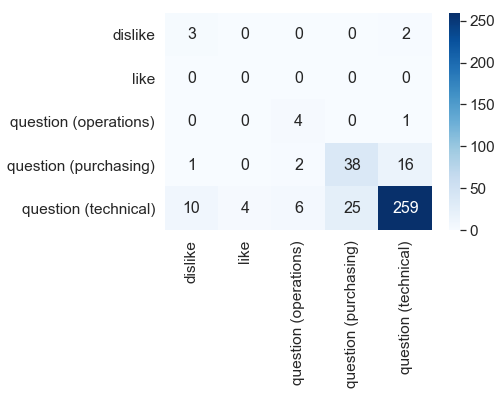

In [81]:
cm=metrics.confusion_matrix(count_nb_pred, y_test)
print(cm)
cm = pd.DataFrame(cm, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, cmap="Blues",  annot_kws={"size": 16}, fmt='g') # font size

plt.show()

In [82]:
keywords = ['keyboard', 'trackpad', 'audio', 'speaker', 'camera', 'webcam', 'crash', 'track pad', 'freeze', 'display', 'lcd', 
            'graphic', 'vmware', 'disappointing', 'oled', 'unresponsive', 'hinge', 'touchpad', 'thunderbolt', 'port', 'bad', 'configuration', 'backlit', 'ram', 'fps',  'video', 'cover',
            'discontinued', 'recalled', 'selling', 'usb', 'driver', 'drives', 'linux', 'boot', 'hot', 'battery', 'stuttering', 'purchasing',
            'stuck', 'frustrating', 'logo', 'mother board', 'motherboard', 'fail', 'sunk', 'sink', 'corner', 'bios', 'firmware', 'kb',
            'review' , 'ssd', 'install', 'resolution', 'wifi', 'slow', 'terrible', 'ubuntu', 'monitor', 'adapter', 
            'shipped', 'shipment', 'ship', 'error', 'sunk', 'sink', 'corner', 'bios', 'firmware', 'refurbished', 'repair', 'repaired', 
            'charger', 'fan', 'charging', 'charge', 'air', 'cooling', 'disappointed', 'rattle', 'rattling', 'noise', 'buy', 
            'heat', 'power', 'released','release', 'volume', 'drain', 'missing', 'recall', 'remove', 'doubt', 'gpu', 'dock', 'wobble', 'break', 'touch pen', 
            'trouble', 'switch', 'overheat', 'cost', 'play', 'pleasant', 'support', 'search', 'disk', 'consider', 'cursor', 'fingerprint', 'overheating', 'throttling', 'throttle', 'thermal', 'warranty', 'flicker', 'against', 'tearing', 'haptic', 'suck', 'hibernate', 'undervolting', 'delay', 'awful', 'hardcase', 'touch', 'disaster', 'driver', 'popping', 'button', 'chassis', 'cracking', 
            'lid', 'atrocious', 'gorgeous', 'impressed', 'service','decal', 'recommendation', 'lace', 'fps', 'case', 'pixel', 'purchase', 'option', 'happy', 'satisfied', 'dislike', 'safeguard', 'garbage', 'window', 'shutting', 'underwhelmed', 'got', 'skin', 'looking', 'decide', 'recommend', 'difference', 'choosing', 'shutdown', 'saturation', 'stain', 'run', 'order', 'molding', 'temp', 'color', 'oversaturated', 'love', 'store', 'complain','return', 'stuttering', 'microphone', 'desperation', 'headphone', 'buzzing', 'ridiculous', 'worse', 'screen', 'poor', 'low',
            'replacement', 'backlight', 'slot', 'compatibility', 'key', 'feedback', 'lagging', 'compare', 'egpu', 'horrible', 'cpu', 'bluetooth', 'dgpu', 'lag', 'retrospective','photo', 'stereo', 'dongle', 'sound']

In [83]:
df['keyword'] = df['combined'].str.findall('|'.join(keywords)).apply(set).str.join(', ')
df.insert(4, 'keyword', df.pop('keyword'))
df

,counter,post date,model,source,keyword,label,number of likes,number of comments,title,content,link,combined
0,1,2023-01-08,inspiron 16 5620,inspiron (dell) - reddit,"error, fail, temp, driver, touch, key, support...",question (technical),1,1,brand new inspiron 16 5620 touchpad stops work...,"as stated, brand new inspiron laptop received ...",https://www.reddit.com/r/Dell/comments/106svhi...,brand new inspiron 16 5620 touchpad stops work...
1,2,2022-12-31,inspiron 16 plus 7620,inspiron (dell) - reddit,"port, slow, lid, charger, dock, charging, moni...",question (technical),6,1,i can confirm the wd22tb4 works flawlessly wit...,"i am not sure why on the dell website, the doc...",https://www.reddit.com/r/Dell/comments/1000y12...,i can confirm the wd22tb4 works flawlessly wit...
2,3,2022-12-25,inspiron 16 plus 7620,inspiron (dell) - reddit,"support, run",question (technical),1,4,dell inspiron 7620 memory,hi i noticed that the dell inspiron 7620 i7 12...,https://www.reddit.com/r/Dell/comments/zuwx0v/...,dell inspiron 7620 memory hi i noticed that th...
3,4,2022-12-17,inspiron 16 plus 7620,inspiron (dell) - reddit,"lag, trackpad, touchpad, stuck, got, window",question (technical),1,2,inspiron 7620 touchpad,"hey all, should have stuck with my theory of a...",https://www.reddit.com/r/Dell/comments/zogtwg/...,"inspiron 7620 touchpad hey all, should have st..."
4,5,2022-12-13,inspiron 16 plus 7620,inspiron (dell) - reddit,"dock, error, bios, port, support, monitor, key...",question (technical),2,1,dell inspiron 16 plus 7620 not recognizing,"hi, sorry if this issue has been solved elsewh...",https://www.reddit.com/r/Dell/comments/zkilk9/...,"dell inspiron 16 plus 7620 not recognizing hi,..."
5,6,2022-12-02,inspiron 16 plus 7620,inspiron (dell) - reddit,"fan, temp, oled, power, consider, low, cpu, run",question (technical),0,4,inspiron 7620: noisy,"hi all, does anyone know why dell doesnt seem ...",https://www.reddit.com/r/Dell/comments/zakyei/...,"inspiron 7620: noisy hi all, does anyone know ..."
6,7,2022-11-27,inspiron 14 5425,inspiron (dell) - reddit,"buy, driver, bios, bluetooth, headphone, got, ...",question (technical),1,1,dell inspiron 5425 wifi,i recently got a new dell inspiron 14 laptop w...,https://www.reddit.com/r/Dell/comments/z5zjbh/...,dell inspiron 5425 wifi i recently got a new d...
7,8,2022-11-26,inspiron 16 plus 7620,inspiron (dell) - reddit,"fan, temp, bios, thermal, install, ram, run, c...",question (technical),1,2,"inspiron 16 plus 7620: fan speed under ""normal...","hello dear forum community, above mentioned la...",https://www.reddit.com/r/Dell/comments/z54fng/...,"inspiron 16 plus 7620: fan speed under ""normal..."
8,9,2022-11-26,inspiron 16 plus 7620,inspiron (dell) - reddit,"support, battery, motherboard, service",question (technical),1,2,how to check the chipset used for the inspiron...,"hello there, i tried to find out what chipset ...",https://www.reddit.com/r/Dell/comments/z4ydee/...,how to check the chipset used for the inspiron...
9,10,2022-11-23,inspiron 15 3525,inspiron (dell) - reddit,consider,question (purchasing),1,1,which radeon processor in dell inspiron 15 352...,i am considering getting a dell inspiron 15 mo...,https://www.reddit.com/r/Dell/comments/z2z6v2/...,which radeon processor in dell inspiron 15 352...


In [84]:
# Create a LinearSVM model
tfidf_svc = LinearSVC(C=1)
tfidf_svc.fit(tfidf_train, y_train)

# Run predict on your tfidf test data to get your predictions
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)

# Calculate your accuracy using the metrics module
tfidf_svc_score = metrics.accuracy_score(tfidf_svc_pred, y_test)


print("LinearSVC tfidf Score:   %0.3f" % tfidf_svc_score)

LinearSVC tfidf Score:   0.836


In [85]:
# Create a LinearSVM model
count_svc = LinearSVC(C=0.1)
count_svc.fit(count_train, y_train)

# Run predict on your tfidf test data to get your predictions
count_svc_pred = count_svc.predict(count_test)

# Calculate your accuracy using the metrics module
count_svc_score = metrics.accuracy_score(count_svc_pred, y_test)


print("LinearSVC count Score:   %0.3f" % count_svc_score)

LinearSVC count Score:   0.801


# XPS Prediction 

In [90]:
df = pd.concat(map(pd.read_csv, ['reddit (xps filtered).csv', 'reddit (label xps) all.csv']), sort=False)
df = df.drop('counter', axis = 1)
df['post date']=pd.to_datetime(df['post date'])
df = df.drop_duplicates(subset=['link'])
df = df.sort_values(by=['post date','source'], ascending = False)
df.insert(0,'counter',range(1, len(df) + 1))
df.to_csv('reddit (label xps) 1.csv', encoding='utf_8_sig', index=False)
df

,counter,post date,model,source,number of likes,number of comments,title,content,link,label
0,1,2023-01-11,xps 17 9710,dellxps - reddit,1,0,dell xps 17 9710 (i7 11800h | 32gb ram | rtx30...,"hello everyone, i purchased an xps 17 9710 in ...",https://www.reddit.com/r/DellXPS/comments/108s...,question (technical)
1,2,2023-01-11,xps 17 9710,dell - reddit,1,0,discussiondell xps 17 9710 (i7 11800h | 32gb r...,"hello everyone, i purchased an xps 17 9710 in ...",https://www.reddit.com/r/Dell/comments/108s48j...,question (technical)
2,3,2023-01-10,xps 8960,xps - reddit,1,0,"evidently, the dell xps 8960 will have certain...",dell has not as yet announced the follow-on to...,https://www.reddit.com/r/XPS/comments/108mcgo/...,question (technical)
3,4,2023-01-10,xps 15 9520,dellxps - reddit,2,2,anyone else having issues with a brand new xps...,i am trying to use whatever resources that are...,https://www.reddit.com/r/DellXPS/comments/108m...,question (technical)
4,5,2023-01-10,xps 15 9510,dellxps - reddit,1,2,thinking about adding storage to my xps 9510 w...,anything with nvme and the largest size you ca...,https://www.reddit.com/r/DellXPS/comments/108i...,question (purchasing)
5,6,2023-01-10,xps 15 9520,dellxps - reddit,0,20,i am choosing between dell xps 15 9520 and asu...,view poll,https://www.reddit.com/r/DellXPS/comments/1080...,question (technical)
6,7,2023-01-09,xps 13 plus 9320,dellxps - reddit,7,6,xps 9320 plus & razer core x = great combo,"hey everyone, this is a pretty niche use-case ...",https://www.reddit.com/r/DellXPS/comments/107k...,question (technical)
7,8,2023-01-09,xps 15 9520,dellxps - reddit,2,7,dell xps 15 9520. ports and portability,could i seek any opinions from owners of the 2...,https://www.reddit.com/r/DellXPS/comments/1078...,question (purchasing)
8,9,2023-01-09,xps 8950,dellxps - reddit,1,4,i found this xps8950 on the side of the road. ...,tldr: what kind of cpu socket is in this? what...,https://www.reddit.com/r/DellXPS/comments/1075...,question (technical)
9,10,2023-01-09,xps 13 plus 9320,dellxps - reddit,1,4,xps 13 plus external display support — 6k / 8k?,"i‘m looking at picking up an xps 13 plus, and ...",https://www.reddit.com/r/DellXPS/comments/1075...,question (technical)


In [91]:
import pandas as pd

# Load data
df = pd.read_csv('reddit (label xps) 1.csv')

df = df[df.isna().any(axis=1)]
# combined only list
df['combined'] = df['title'] + ' ' + df['content']

Xnew = list(df['combined'])
df

,counter,post date,model,source,number of likes,number of comments,title,content,link,label,combined
854,855,2022-08-08,xps 13 plus 9320,dellxps - reddit,0,1,xps 13 plus charging,hello everyone finally got my laptop. its so g...,https://www.reddit.com/r/DellXPS/comments/wiuw...,NaN,xps 13 plus charging hello everyone finally go...
863,864,2022-08-07,xps 13 plus 9320,dellxps - reddit,4,24,"is dells qc actually that bad, or is it just t...",i just ordered my xps 13 plus 9320 for univers...,https://www.reddit.com/r/DellXPS/comments/wii7...,NaN,"is dells qc actually that bad, or is it just t..."
864,865,2022-08-07,xps 13 plus 9320,dellxps - reddit,1,4,what’s the best dock for my new xps 13 plus?,"i ordered my xps 13 plus the other day, and ju...",https://www.reddit.com/r/DellXPS/comments/winy...,NaN,what’s the best dock for my new xps 13 plus? i...
865,866,2022-08-07,xps 13 plus 9320,dellxps - reddit,1,0,dell xps 13 plus keyboard backlight strobing a...,so my dell xps 13 plus running ubuntu 22.04 ra...,https://www.reddit.com/r/DellXPS/comments/wi2y...,NaN,dell xps 13 plus keyboard backlight strobing a...
866,867,2022-08-07,xps 13 9310,dell - reddit,1,4,xps helphaving problem connecting with wifi ne...,possibly neither without knowing more about th...,https://www.reddit.com/r/Dell/comments/wii1v7/...,NaN,xps helphaving problem connecting with wifi ne...
868,869,2022-08-06,xps 13 plus 9320,dellxps - reddit,2,1,is the xps 13 7390 a good option?im going into...,i had one until upgrading to an xps 13 plus. i...,https://www.reddit.com/r/DellXPS/comments/wi1o...,NaN,is the xps 13 7390 a good option?im going into...
869,870,2022-08-06,xps 17 9720,dellxps - reddit,3,20,xps 17 9720 -2022 heat from the keyboard,good morning. i've had my dell xps 17 2022 -97...,https://www.reddit.com/r/DellXPS/comments/whju...,NaN,xps 17 9720 -2022 heat from the keyboard good ...
870,871,2022-08-06,xps 8950,dellxps - reddit,1,8,coupon code for dell website?,i am on the verge of buying a new dell xps 895...,https://www.reddit.com/r/DellXPS/comments/whpo...,NaN,coupon code for dell website? i am on the verg...
871,872,2022-08-06,xps 17 9710,dellxps - reddit,4,23,should i return dell xps 17 9710 or legion 5i ...,"xps 17 9710 11th gen i7-11800h rtx 3060 17"" 38...",https://www.reddit.com/r/DellXPS/comments/whdd...,NaN,should i return dell xps 17 9710 or legion 5i ...
872,873,2022-08-06,xps 13 plus 9320,dellxps - reddit,2,4,xps 13 or xps 13 plus for a bio student,hello. so i will be going into my first year o...,https://www.reddit.com/r/DellXPS/comments/whe1...,NaN,xps 13 or xps 13 plus for a bio student hello....


In [92]:
tfidf_test2 = tfidf_vectorizer.transform(Xnew)
tfidf_test2

# Run predict on your tfidf test data to get your predictions
tfidf_svc_pred2 = tfidf_svc.predict(tfidf_test2)
tfidf_svc_pred2

array(['question (technical)', 'question (technical)',
       'question (purchasing)', 'question (technical)',
       'question (technical)', 'question (purchasing)',
       'question (technical)', 'question (purchasing)',
       'question (purchasing)', 'question (purchasing)',
       'question (technical)', 'question (purchasing)',
       'question (purchasing)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (purchasing)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (purchasing)',
       'question (technical)', 'question (purchasing)',
       'question (purchasing)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',

In [93]:
df['label'] = tfidf_svc_pred2
df = df.drop('combined', axis =1)
df.to_csv('reddit (label xps) updated.csv', encoding='utf_8_sig', index=False)
df

,counter,post date,model,source,number of likes,number of comments,title,content,link,label
854,855,2022-08-08,xps 13 plus 9320,dellxps - reddit,0,1,xps 13 plus charging,hello everyone finally got my laptop. its so g...,https://www.reddit.com/r/DellXPS/comments/wiuw...,question (technical)
863,864,2022-08-07,xps 13 plus 9320,dellxps - reddit,4,24,"is dells qc actually that bad, or is it just t...",i just ordered my xps 13 plus 9320 for univers...,https://www.reddit.com/r/DellXPS/comments/wii7...,question (technical)
864,865,2022-08-07,xps 13 plus 9320,dellxps - reddit,1,4,what’s the best dock for my new xps 13 plus?,"i ordered my xps 13 plus the other day, and ju...",https://www.reddit.com/r/DellXPS/comments/winy...,question (purchasing)
865,866,2022-08-07,xps 13 plus 9320,dellxps - reddit,1,0,dell xps 13 plus keyboard backlight strobing a...,so my dell xps 13 plus running ubuntu 22.04 ra...,https://www.reddit.com/r/DellXPS/comments/wi2y...,question (technical)
866,867,2022-08-07,xps 13 9310,dell - reddit,1,4,xps helphaving problem connecting with wifi ne...,possibly neither without knowing more about th...,https://www.reddit.com/r/Dell/comments/wii1v7/...,question (technical)
868,869,2022-08-06,xps 13 plus 9320,dellxps - reddit,2,1,is the xps 13 7390 a good option?im going into...,i had one until upgrading to an xps 13 plus. i...,https://www.reddit.com/r/DellXPS/comments/wi1o...,question (purchasing)
869,870,2022-08-06,xps 17 9720,dellxps - reddit,3,20,xps 17 9720 -2022 heat from the keyboard,good morning. i've had my dell xps 17 2022 -97...,https://www.reddit.com/r/DellXPS/comments/whju...,question (technical)
870,871,2022-08-06,xps 8950,dellxps - reddit,1,8,coupon code for dell website?,i am on the verge of buying a new dell xps 895...,https://www.reddit.com/r/DellXPS/comments/whpo...,question (purchasing)
871,872,2022-08-06,xps 17 9710,dellxps - reddit,4,23,should i return dell xps 17 9710 or legion 5i ...,"xps 17 9710 11th gen i7-11800h rtx 3060 17"" 38...",https://www.reddit.com/r/DellXPS/comments/whdd...,question (purchasing)
872,873,2022-08-06,xps 13 plus 9320,dellxps - reddit,2,4,xps 13 or xps 13 plus for a bio student,hello. so i will be going into my first year o...,https://www.reddit.com/r/DellXPS/comments/whe1...,question (purchasing)


In [94]:
# Load data
df = pd.concat(map(pd.read_csv, ['reddit (label xps) updated.csv', 'reddit (label xps) all.csv']))
df = df.drop('counter', axis = 1)
df['post date']=pd.to_datetime(df['post date'])
df = df.drop_duplicates(subset=['link'])
df = df.sort_values(by=['post date','source'], ascending = False)
df.insert(0,'counter',range(1, len(df) + 1))
df.to_csv('reddit (label xps) all.csv', encoding='utf_8_sig', index=False)
df

C:\Users\xup641284\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,counter,content,label,link,model,number of comments,number of likes,post date,source,title
0,1,"hello everyone, i purchased an xps 17 9710 in ...",question (technical),https://www.reddit.com/r/DellXPS/comments/108s...,xps 17 9710,0,1,2023-01-11,dellxps - reddit,dell xps 17 9710 (i7 11800h | 32gb ram | rtx30...
1,2,"hello everyone, i purchased an xps 17 9710 in ...",question (technical),https://www.reddit.com/r/Dell/comments/108s48j...,xps 17 9710,0,1,2023-01-11,dell - reddit,discussiondell xps 17 9710 (i7 11800h | 32gb r...
2,3,dell has not as yet announced the follow-on to...,question (technical),https://www.reddit.com/r/XPS/comments/108mcgo/...,xps 8960,0,1,2023-01-10,xps - reddit,"evidently, the dell xps 8960 will have certain..."
3,4,i am trying to use whatever resources that are...,question (technical),https://www.reddit.com/r/DellXPS/comments/108m...,xps 15 9520,2,2,2023-01-10,dellxps - reddit,anyone else having issues with a brand new xps...
4,5,anything with nvme and the largest size you ca...,question (purchasing),https://www.reddit.com/r/DellXPS/comments/108i...,xps 15 9510,2,1,2023-01-10,dellxps - reddit,thinking about adding storage to my xps 9510 w...
5,6,view poll,question (technical),https://www.reddit.com/r/DellXPS/comments/1080...,xps 15 9520,20,0,2023-01-10,dellxps - reddit,i am choosing between dell xps 15 9520 and asu...
6,7,"hey everyone, this is a pretty niche use-case ...",question (technical),https://www.reddit.com/r/DellXPS/comments/107k...,xps 13 plus 9320,6,7,2023-01-09,dellxps - reddit,xps 9320 plus & razer core x = great combo
7,8,could i seek any opinions from owners of the 2...,question (purchasing),https://www.reddit.com/r/DellXPS/comments/1078...,xps 15 9520,7,2,2023-01-09,dellxps - reddit,dell xps 15 9520. ports and portability
8,9,tldr: what kind of cpu socket is in this? what...,question (technical),https://www.reddit.com/r/DellXPS/comments/1075...,xps 8950,4,1,2023-01-09,dellxps - reddit,i found this xps8950 on the side of the road. ...
9,10,"i‘m looking at picking up an xps 13 plus, and ...",question (technical),https://www.reddit.com/r/DellXPS/comments/1075...,xps 13 plus 9320,4,1,2023-01-09,dellxps - reddit,xps 13 plus external display support — 6k / 8k?


# Inspiron new data

In [48]:
import pandas as pd

# Load data
df = pd.read_csv('reddit (inspiron filtered).csv')

df = df.dropna(axis=0)

# combined only list
df['combined'] = df['title'] + ' ' + df['content']

Xnew = list(df['combined'])

In [49]:
tfidf_test2 = tfidf_vectorizer.transform(Xnew)
tfidf_test2

# Run predict on your count test data to get your predictions
tfidf_svc_pred2 = tfidf_svc.predict(tfidf_test2)
tfidf_svc_pred2

array(['question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (purchasing)',
       'question (technical)', 'question (purchasing)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (purchasing)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (purchasing)',
       'question (purchasing)', 'question (technical)',
       'question (technical)', 'question (technical)'], dtype=object)

In [50]:
df.insert(4,'label',tfidf_svc_pred2)
df = df.drop('combined', axis =1)
df.to_csv('reddit (label inspiron).csv', encoding='utf_8_sig', index=False)
df

,counter,post date,model,source,label,number of likes,number of comments,title,content,link
0,1,2023-01-08,inspiron 16 5620,inspiron (dell) - reddit,question (technical),1,1,brand new inspiron 16 5620 touchpad stops work...,"as stated, brand new inspiron laptop received ...",https://www.reddit.com/r/Dell/comments/106svhi...
1,2,2022-12-31,inspiron 16 plus 7620,inspiron (dell) - reddit,question (technical),6,1,i can confirm the wd22tb4 works flawlessly wit...,"i am not sure why on the dell website, the doc...",https://www.reddit.com/r/Dell/comments/1000y12...
2,3,2022-12-25,inspiron 16 plus 7620,inspiron (dell) - reddit,question (technical),1,4,dell inspiron 7620 memory,hi i noticed that the dell inspiron 7620 i7 12...,https://www.reddit.com/r/Dell/comments/zuwx0v/...
3,4,2022-12-17,inspiron 16 plus 7620,inspiron (dell) - reddit,question (technical),1,2,inspiron 7620 touchpad,"hey all, should have stuck with my theory of a...",https://www.reddit.com/r/Dell/comments/zogtwg/...
4,5,2022-12-13,inspiron 16 plus 7620,inspiron (dell) - reddit,question (technical),2,1,dell inspiron 16 plus 7620 not recognizing,"hi, sorry if this issue has been solved elsewh...",https://www.reddit.com/r/Dell/comments/zkilk9/...
5,6,2022-12-02,inspiron 16 plus 7620,inspiron (dell) - reddit,question (technical),0,4,inspiron 7620: noisy,"hi all, does anyone know why dell doesnt seem ...",https://www.reddit.com/r/Dell/comments/zakyei/...
6,7,2022-11-27,inspiron 14 5425,inspiron (dell) - reddit,question (technical),1,1,dell inspiron 5425 wifi,i recently got a new dell inspiron 14 laptop w...,https://www.reddit.com/r/Dell/comments/z5zjbh/...
7,8,2022-11-26,inspiron 16 plus 7620,inspiron (dell) - reddit,question (technical),1,2,"inspiron 16 plus 7620: fan speed under ""normal...","hello dear forum community, above mentioned la...",https://www.reddit.com/r/Dell/comments/z54fng/...
8,9,2022-11-26,inspiron 16 plus 7620,inspiron (dell) - reddit,question (technical),1,2,how to check the chipset used for the inspiron...,"hello there, i tried to find out what chipset ...",https://www.reddit.com/r/Dell/comments/z4ydee/...
9,10,2022-11-23,inspiron 15 3525,inspiron (dell) - reddit,question (purchasing),1,1,which radeon processor in dell inspiron 15 352...,i am considering getting a dell inspiron 15 mo...,https://www.reddit.com/r/Dell/comments/z2z6v2/...


# G15 new data

In [51]:
import pandas as pd

# Load data
df = pd.read_csv('reddit (dellg15 filtered).csv')

df = df.dropna(axis=0)

# combined only list
df['combined'] = df['title'] + ' ' + df['content']

Xnew = list(df['combined'])

In [52]:
tfidf_test2 = tfidf_vectorizer.transform(Xnew)
tfidf_test2

# Run predict on your count test data to get your predictions
tfidf_svc_pred2 = tfidf_svc.predict(tfidf_test2)
tfidf_svc_pred2

array(['question (technical)', 'question (technical)',
       'question (purchasing)', 'question (purchasing)',
       'question (technical)', 'question (purchasing)',
       'question (purchasing)', 'question (purchasing)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)'], dtype=object)

In [53]:
df.insert(4,'label',tfidf_svc_pred2)
df = df.drop('combined', axis =1)
df.to_csv('reddit (label dellg15).csv', encoding='utf_8_sig', index=False)
df

,counter,post date,model,source,label,number of likes,number of comments,title,content,link
0,1,2023-01-05,dell g15 5520,dellg15 (gaming) - reddit,question (technical),1,2,recommendationdell g15 vs acer nitro 5,hey guys! which of the two laptops would you p...,https://www.reddit.com/r/GamingLaptops/comment...
1,2,2023-01-02,dell g16 7620,dellg15 (gaming) - reddit,question (technical),1,3,recommendationdell g16 or msi ge76,i ordered the deal on the dell g16 7620 that h...,https://www.reddit.com/r/GamingLaptops/comment...
2,3,2022-07-28,dell g15 5520,dellg15 (gaming) - reddit,question (purchasing),1,3,laptop recommendationdell g15 or legion (300€+),hi there. is legion 5i (i7/3070) worth over de...,https://www.reddit.com/r/GamingLaptops/comment...
3,4,2022-07-22,dell g15 5520,dellg15 (dell) - reddit,question (purchasing),2,2,helpis dell g15 5520 refurbished is good ?,i will buy a one in the next month and i want ...,https://www.reddit.com/r/Dell/comments/w51z6o/...
4,5,2022-07-19,dell g15 5520,dellg15 (gaming) - reddit,question (technical),5,1,recommendationdell g15 5520 vs 5521,"hi there, would you suggest 5520 with i7/3070 ...",https://www.reddit.com/r/GamingLaptops/comment...
5,6,2022-07-18,dell g15 5520,dellg15 (gaming) - reddit,question (purchasing),1,2,discussiondell g15 5520 questions,"hi, i am thinking about a g15 i7/3070ti, 165 h...",https://www.reddit.com/r/GamingLaptops/comment...
6,7,2022-07-16,dell g15 5520,dellg15 (gaming) - reddit,question (purchasing),1,0,questionwhat's the difference between a dell g...,both of these are similarly priced in my count...,https://www.reddit.com/r/GamingLaptops/comment...
7,8,2022-06-21,dell g15 5520,dellg15 (dell) - reddit,question (purchasing),3,25,helpdell g15 5520 opinions?,"i’m going to buy the setup with i7 12th gen, r...",https://www.reddit.com/r/Dell/comments/vhacd1/...
8,9,2022-06-16,dell g15 5520,dellg15 (dell) - reddit,question (technical),1,0,"discussiondell g15 5520, i7 12700, nv3060, 16g...","una duda, tengo la opción de una dell g15 5520...",https://www.reddit.com/r/Dell/comments/vdqvbv/...
9,10,2022-04-13,dell g15 5520,dellg15 (gaming) - reddit,question (technical),0,4,laptop recommendationdell g15 5520 vs dell g15...,"i have confusion in two dell g15 models, could...",https://www.reddit.com/r/GamingLaptops/comment...


# Vostro new data

In [54]:
import pandas as pd

# Load data
df = pd.read_csv('reddit (vostro filtered).csv')

df = df.dropna(axis=0)

# combined only list
df['combined'] = df['title'] + ' ' + df['content']

Xnew = list(df['combined'])

In [55]:
tfidf_test2 = tfidf_vectorizer.transform(Xnew)
tfidf_test2

# Run predict on your count test data to get your predictions
tfidf_svc_pred2 = tfidf_svc.predict(tfidf_test2)
tfidf_svc_pred2

array(['question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (purchasing)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (purchasing)', 'question (technical)'], dtype=object)

In [56]:
df.insert(4,'label',tfidf_svc_pred2)
df = df.drop('combined', axis =1)
df.to_csv('reddit (label vostro).csv', encoding='utf_8_sig', index=False)
df

,counter,post date,model,source,label,number of likes,number of comments,title,content,link
0,1,2023-01-05,vostro 7620,vostro (dell) - reddit,question (technical),2,2,dell vostro 7620 - memory,"i bought a dell vostro 7620 notebook, and i ne...",https://www.reddit.com/r/Dell/comments/103xq5g...
1,2,2022-11-13,vostro 7620,vostro (dell) - reddit,question (technical),1,2,vostro 7620 fan runs,i purchased a vostro 7620 a while back. it's t...,https://www.reddit.com/r/Dell/comments/yu2y3e/...
2,3,2022-11-03,vostro 7620,vostro (dell) - reddit,question (technical),2,3,french quotation marks (alt car + z or x) on d...,"hi, anyone can help? can't get the quotation m...",https://www.reddit.com/r/Dell/comments/yksojg/...
3,4,2022-10-01,vostro 7620,vostro (dell) - reddit,question (technical),2,4,vostro 7500 nvme slow read,"hi all, i have a vostro 7500 (i7- 10750h, 24 g...",https://www.reddit.com/r/Dell/comments/xt0bri/...
4,5,2022-09-06,vostro 5620,vostro (dell) - reddit,question (technical),1,1,brand new dell vostro 5620 fans are really lou...,just got a vostro 5620 and the fans are really...,https://www.reddit.com/r/Dell/comments/x7ad7m/...
5,6,2022-08-24,vostro 5620,vostro (dell) - reddit,question (technical),1,1,vostro 5620 loud fans kicking in all the,this is my first windows laptop. is it normal ...,https://www.reddit.com/r/Dell/comments/wwx1zq/...
6,7,2022-08-24,vostro 5620,vostro (dell) - reddit,question (purchasing),1,0,latitude 5k worth the extra $500 than vostro,i want a mid-ranged laptop for my web developm...,https://www.reddit.com/r/Dell/comments/ww9he7/...
7,8,2022-08-10,vostro 7620,vostro (dell) - reddit,question (technical),3,0,vostro 7620 -intel i7-12700h cpu very slow & i...,edit / update: i've resolved the issue by rein...,https://www.reddit.com/r/Dell/comments/wkncex/...
8,9,2022-07-10,vostro 7620,vostro (dell) - reddit,question (technical),5,8,vostro 7620,"i haven't seen one yet, so here is mine: it fr...",https://www.reddit.com/r/Dell/comments/vvw919/...
9,10,2022-07-07,vostro 5620,vostro (dell) - reddit,question (technical),1,0,"dell vostro 5620, windows 11 stuck at 48fps, b...",model: dell vostro 5620 cpu: i7-1260p gpu: iri...,https://www.reddit.com/r/Dell/comments/vtkb2j/...


# XPS odm new data

In [57]:
import pandas as pd

# Load data
df = pd.read_csv('reddit (xps odm filtered).csv')

df = df.dropna(axis=0)

# combined only list
df['combined'] = df['title'] + ' ' + df['content']

Xnew = list(df['combined'])

In [58]:
tfidf_test2 = tfidf_vectorizer.transform(Xnew)
tfidf_test2

# Run predict on your count test data to get your predictions
tfidf_svc_pred2 = tfidf_svc.predict(tfidf_test2)
tfidf_svc_pred2

array(['question (technical)', 'question (technical)',
       'question (technical)', 'question (purchasing)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (purchasing)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (purchasing)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       

In [59]:
df.insert(5,'label',tfidf_svc_pred2)
df = df.drop('combined', axis =1)
df.to_csv('reddit (label odm xps).csv', encoding='utf_8_sig', index=False)
df

,counter,post date,model,family grandparent,source,label,number of likes,number of comments,title,content,link
0,1,2023-01-10,xps 15 9520,Fiorano ADL,dellxps - reddit,question (technical),2,2,anyone else having issues with a brand new xps...,i am trying to use whatever resources that are...,https://www.reddit.com/r/DellXPS/comments/108m...
1,2,2023-01-10,xps 15 9520,Fiorano ADL,dellxps - reddit,question (technical),0,20,i am choosing between dell xps 15 9520 and asu...,view poll,https://www.reddit.com/r/DellXPS/comments/1080...
2,3,2023-01-09,xps 13 plus 9320,Tributo ADL,dellxps - reddit,question (technical),10,7,xps 9320 plus & razer core x = great combo,"hey everyone, this is a pretty niche use-case ...",https://www.reddit.com/r/DellXPS/comments/107k...
3,4,2023-01-09,xps 15 9520,Fiorano ADL,dellxps - reddit,question (purchasing),2,7,dell xps 15 9520. ports and portability,could i seek any opinions from owners of the 2...,https://www.reddit.com/r/DellXPS/comments/1078...
4,5,2023-01-09,xps 13 plus 9320,Tributo ADL,dellxps - reddit,question (technical),1,4,xps 13 plus external display support — 6k / 8k?,"i‘m looking at picking up an xps 13 plus, and ...",https://www.reddit.com/r/DellXPS/comments/1075...
...,...,...,...,...,...,...,...,...,...,...,...
564,565,2022-03-31,xps 15 9520,Fiorano ADL,dellxps - reddit,question (operations),6,29,xps 9520 / 9720,"anyone, who order 9520/9720, can you share whe...",https://www.reddit.com/r/DellXPS/comments/tssh...
565,566,2022-03-30,xps 15 9520,Fiorano ADL,dellxps - reddit,question (technical),3,3,9520 real specs and service manual,has anyone found them yet? like can it take 4t...,https://www.reddit.com/r/DellXPS/comments/tslb...
566,567,2022-03-30,xps 15 9520,Fiorano ADL,dellxps - reddit,question (technical),1,0,ìneed help// i have dell xps 9570 8th gen with...,No text content !,https://www.reddit.com/r/DellXPS/comments/tsbx...
567,568,2022-03-25,xps 15 9520,Fiorano ADL,dellxps - reddit,question (technical),11,22,purchased the new xps 15 9520 (i7/3050ti/16gb/...,just purchased the new xps 15 9520 to upgrade ...,https://www.reddit.com/r/DellXPS/comments/tnjs...


# Inspiron odm new data

In [60]:
import pandas as pd

# Load data
df = pd.read_csv('reddit (inspiron odm filtered).csv')

df = df.dropna(axis=0)

# combined only list
df['combined'] = df['title'] + ' ' + df['content']

Xnew = list(df['combined'])

In [61]:
tfidf_test2 = tfidf_vectorizer.transform(Xnew)
tfidf_test2

# Run predict on your count test data to get your predictions
tfidf_svc_pred2 = tfidf_svc.predict(tfidf_test2)
tfidf_svc_pred2

array(['question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (purchasing)',
       'question (technical)', 'question (purchasing)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (purchasing)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (purchasing)', 'question (purchasing)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)'], dtype=object)

In [62]:
df.insert(5,'label',tfidf_svc_pred2)
df = df.drop('combined', axis =1)
df.to_csv('reddit (label odm inspiron).csv', encoding='utf_8_sig', index=False)
df

,counter,post date,model,family grandparent,source,label,number of likes,number of comments,title,content,link
0,1,2023-01-08,inspiron 16 5620,Odin N5 16 ADL,inspiron (dell) - reddit,question (technical),1,1,brand new inspiron 16 5620 touchpad stops work...,"as stated, brand new inspiron laptop received ...",https://www.reddit.com/r/Dell/comments/106svhi...
1,2,2022-12-31,inspiron 16 plus 7620,Odin N 16 ADL-H,inspiron (dell) - reddit,question (technical),6,1,i can confirm the wd22tb4 works flawlessly wit...,"i am not sure why on the dell website, the doc...",https://www.reddit.com/r/Dell/comments/1000y12...
2,3,2022-12-25,inspiron 16 plus 7620,Odin N 16 ADL-H,inspiron (dell) - reddit,question (technical),1,4,dell inspiron 7620 memory,hi i noticed that the dell inspiron 7620 i7 12...,https://www.reddit.com/r/Dell/comments/zuwx0v/...
3,4,2022-12-17,inspiron 16 plus 7620,Odin N 16 ADL-H,inspiron (dell) - reddit,question (technical),1,2,inspiron 7620 touchpad,"hey all, should have stuck with my theory of a...",https://www.reddit.com/r/Dell/comments/zogtwg/...
4,5,2022-12-13,inspiron 16 plus 7620,Odin N 16 ADL-H,inspiron (dell) - reddit,question (technical),2,1,dell inspiron 16 plus 7620 not recognizing,"hi, sorry if this issue has been solved elsewh...",https://www.reddit.com/r/Dell/comments/zkilk9/...
5,6,2022-12-02,inspiron 16 plus 7620,Odin N 16 ADL-H,inspiron (dell) - reddit,question (technical),0,4,inspiron 7620: noisy,"hi all, does anyone know why dell doesnt seem ...",https://www.reddit.com/r/Dell/comments/zakyei/...
6,7,2022-11-27,inspiron 14 5425,Odin N5 14 AMD,inspiron (dell) - reddit,question (technical),1,1,dell inspiron 5425 wifi,i recently got a new dell inspiron 14 laptop w...,https://www.reddit.com/r/Dell/comments/z5zjbh/...
7,8,2022-11-26,inspiron 16 plus 7620,Odin N 16 ADL-H,inspiron (dell) - reddit,question (technical),1,2,"inspiron 16 plus 7620: fan speed under ""normal...","hello dear forum community, above mentioned la...",https://www.reddit.com/r/Dell/comments/z54fng/...
8,9,2022-11-26,inspiron 16 plus 7620,Odin N 16 ADL-H,inspiron (dell) - reddit,question (technical),1,2,how to check the chipset used for the inspiron...,"hello there, i tried to find out what chipset ...",https://www.reddit.com/r/Dell/comments/z4ydee/...
9,10,2022-11-23,inspiron 15 3525,Warlock N 15 MLK AMD BARCELO_DALI,inspiron (dell) - reddit,question (purchasing),1,1,which radeon processor in dell inspiron 15 352...,i am considering getting a dell inspiron 15 mo...,https://www.reddit.com/r/Dell/comments/z2z6v2/...


# Vostro odm new data

In [63]:
import pandas as pd

# Load data
df = pd.read_csv('reddit (vostro odm filtered).csv')

df = df.dropna(axis=0)

# combined only list
df['combined'] = df['title'] + ' ' + df['content']

Xnew = list(df['combined'])

In [64]:
tfidf_test2 = tfidf_vectorizer.transform(Xnew)
tfidf_test2

# Run predict on your count test data to get your predictions
tfidf_svc_pred2 = tfidf_svc.predict(tfidf_test2)
tfidf_svc_pred2

array(['question (technical)', 'question (technical)',
       'question (technical)', 'question (purchasing)',
       'question (technical)', 'question (technical)',
       'question (technical)'], dtype=object)

In [65]:
df.insert(5,'label',tfidf_svc_pred2)
df = df.drop('combined', axis =1)
df.to_csv('reddit (label odm vostro).csv', encoding='utf_8_sig', index=False)
df

,counter,post date,model,family grandparent,source,label,number of likes,number of comments,title,content,link
0,1,2022-12-06,vostro 5320,Odin 13 V ADL,vostro (dell) - reddit,question (technical),1,3,i am getting 2 amber and 7 white led flashing ...,"hello, i have a dell vostro 5320 laptop that i...",https://www.reddit.com/r/Dell/comments/ze3mnb/...
1,2,2022-09-06,vostro 5620,Odin V5 16 ADL,vostro (dell) - reddit,question (technical),1,1,brand new dell vostro 5620 fans are really lou...,just got a vostro 5620 and the fans are really...,https://www.reddit.com/r/Dell/comments/x7ad7m/...
2,3,2022-08-24,vostro 5620,Odin V5 16 ADL,vostro (dell) - reddit,question (technical),1,1,vostro 5620 loud fans kicking in all the,this is my first windows laptop. is it normal ...,https://www.reddit.com/r/Dell/comments/wwx1zq/...
3,4,2022-08-24,vostro 5620,Odin V5 16 ADL,vostro (dell) - reddit,question (purchasing),1,0,latitude 5k worth the extra $500 than vostro,i want a mid-ranged laptop for my web developm...,https://www.reddit.com/r/Dell/comments/ww9he7/...
4,5,2022-07-07,vostro 5620,Odin V5 16 ADL,vostro (dell) - reddit,question (technical),1,0,"dell vostro 5620, windows 11 stuck at 48fps, b...",model: dell vostro 5620 cpu: i7-1260p gpu: iri...,https://www.reddit.com/r/Dell/comments/vtkb2j/...
5,6,2022-05-28,vostro 5620,Odin V5 16 ADL,vostro (dell) - reddit,question (technical),1,6,vostro 5620 throttling at low,"hey, just got a 5620 with an i7-1260p, i don't...",https://www.reddit.com/r/Dell/comments/uzqdtv/...
6,7,2022-05-24,vostro 5320,Odin 13 V ADL,vostro (dell) - reddit,question (technical),6,13,"is the new inspiron 14"" with an i7-1255u good ...",howdy all! i am looking forward to buying a ne...,https://www.reddit.com/r/Dell/comments/uwmymc/...


# XPS odm comment data

In [66]:
import pandas as pd

# Load data
df = pd.read_csv('reddit (xps odm comment filtered).csv')

df = df.dropna(axis=0)

# combined only list
df['combined'] = df['title'] + ' ' + df['content']

Xnew = list(df['combined'])

In [67]:
tfidf_test2 = tfidf_vectorizer.transform(Xnew)
tfidf_test2

# Run predict on your count test data to get your predictions
tfidf_svc_pred2 = tfidf_svc.predict(tfidf_test2)
tfidf_svc_pred2

array(['question (technical)', 'question (technical)',
       'question (technical)', 'question (purchasing)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (purchasing)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (purchasing)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       

In [68]:
df.insert(5,'label',tfidf_svc_pred2)
df = df.drop('combined', axis =1)
df.to_csv('reddit (label odm comment xps).csv', encoding='utf_8_sig', index=False)
df

,counter,post date,model,family grandparent,source,label,number of likes,number of comments,title,content,link,content of comment
0,1,2023-01-10,xps 15 9520,Fiorano ADL,dellxps - reddit,question (technical),2,2,anyone else having issues with a brand new xps...,i am trying to use whatever resources that are...,https://www.reddit.com/r/DellXPS/comments/108m...,(0 children)There is video about similar probl...
1,2,2023-01-10,xps 15 9520,Fiorano ADL,dellxps - reddit,question (technical),0,20,i am choosing between dell xps 15 9520 and asu...,view poll,https://www.reddit.com/r/DellXPS/comments/1080...,(1 child)In my opinion the XPS will perform be...
2,3,2023-01-09,xps 13 plus 9320,Tributo ADL,dellxps - reddit,question (technical),10,7,xps 9320 plus & razer core x = great combo,"hey everyone, this is a pretty niche use-case ...",https://www.reddit.com/r/DellXPS/comments/107k...,(3 children)I have a plus and I've always been...
3,4,2023-01-09,xps 15 9520,Fiorano ADL,dellxps - reddit,question (purchasing),2,7,dell xps 15 9520. ports and portability,could i seek any opinions from owners of the 2...,https://www.reddit.com/r/DellXPS/comments/1078...,"(3 children)Well, since you seem to have alrea..."
4,5,2023-01-09,xps 13 plus 9320,Tributo ADL,dellxps - reddit,question (technical),1,4,xps 13 plus external display support — 6k / 8k?,"i‘m looking at picking up an xps 13 plus, and ...",https://www.reddit.com/r/DellXPS/comments/1075...,"(0 children)I'm not sure about the 6k monitor,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,2022-03-31,xps 15 9520,Fiorano ADL,dellxps - reddit,question (operations),6,29,xps 9520 / 9720,"anyone, who order 9520/9720, can you share whe...",https://www.reddit.com/r/DellXPS/comments/tssh...,(1 child)My 9520 is scheduled to arrive next w...
565,566,2022-03-30,xps 15 9520,Fiorano ADL,dellxps - reddit,question (technical),3,3,9520 real specs and service manual,has anyone found them yet? like can it take 4t...,https://www.reddit.com/r/DellXPS/comments/tslb...,"(0 children)Also, if anyone has a changelog/up..."
566,567,2022-03-30,xps 15 9520,Fiorano ADL,dellxps - reddit,question (technical),1,0,ìneed help// i have dell xps 9570 8th gen with...,No text content !,https://www.reddit.com/r/DellXPS/comments/tsbx...,No comments
567,568,2022-03-25,xps 15 9520,Fiorano ADL,dellxps - reddit,question (technical),11,22,purchased the new xps 15 9520 (i7/3050ti/16gb/...,just purchased the new xps 15 9520 to upgrade ...,https://www.reddit.com/r/DellXPS/comments/tnjs...,(6 children)Just purchased the new XPS 15 9520...


# Inspiron odm comment data

In [69]:
import pandas as pd

# Load data
df = pd.read_csv('reddit (inspiron odm comment filtered).csv')

df = df.dropna(axis=0)

# combined only list
df['combined'] = df['title'] + ' ' + df['content']

Xnew = list(df['combined'])

In [70]:
tfidf_test2 = tfidf_vectorizer.transform(Xnew)
tfidf_test2

# Run predict on your count test data to get your predictions
tfidf_svc_pred2 = tfidf_svc.predict(tfidf_test2)
tfidf_svc_pred2

array(['question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (purchasing)',
       'question (technical)', 'question (purchasing)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (purchasing)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)',
       'question (purchasing)', 'question (purchasing)',
       'question (technical)', 'question (technical)',
       'question (technical)', 'question (technical)'], dtype=object)

In [71]:
df.insert(5,'label',tfidf_svc_pred2)
df = df.drop('combined', axis =1)
df.to_csv('reddit (label odm comment inspiron).csv', encoding='utf_8_sig', index=False)
df

,counter,post date,model,family grandparent,source,label,number of likes,number of comments,title,content,link,content of comment
0,1,2023-01-08,inspiron 16 5620,Odin N5 16 ADL,inspiron (dell) - reddit,question (technical),1.0,1.0,brand new inspiron 16 5620 touchpad stops work...,"as stated, brand new inspiron laptop received ...",https://www.reddit.com/r/Dell/comments/106svhi...,(0 children)You are still within the 30-day re...
1,2,2022-12-31,inspiron 16 plus 7620,Odin N 16 ADL-H,inspiron (dell) - reddit,question (technical),6.0,1.0,i can confirm the wd22tb4 works flawlessly wit...,"i am not sure why on the dell website, the doc...",https://www.reddit.com/r/Dell/comments/1000y12...,(0 children)(Looking for a docking station mys...
2,3,2022-12-25,inspiron 16 plus 7620,Odin N 16 ADL-H,inspiron (dell) - reddit,question (technical),1.0,4.0,dell inspiron 7620 memory,hi i noticed that the dell inspiron 7620 i7 12...,https://www.reddit.com/r/Dell/comments/zuwx0v/...,(3 children)You can go to sites like crucial.c...
3,4,2022-12-17,inspiron 16 plus 7620,Odin N 16 ADL-H,inspiron (dell) - reddit,question (technical),1.0,2.0,inspiron 7620 touchpad,"hey all, should have stuck with my theory of a...",https://www.reddit.com/r/Dell/comments/zogtwg/...,(1 child)This is absolutely a thing. I've had ...
4,5,2022-12-13,inspiron 16 plus 7620,Odin N 16 ADL-H,inspiron (dell) - reddit,question (technical),2.0,1.0,dell inspiron 16 plus 7620 not recognizing,"hi, sorry if this issue has been solved elsewh...",https://www.reddit.com/r/Dell/comments/zkilk9/...,(0 children)I use the same dock with the same ...
5,6,2022-12-02,inspiron 16 plus 7620,Odin N 16 ADL-H,inspiron (dell) - reddit,question (technical),0.0,4.0,inspiron 7620: noisy,"hi all, does anyone know why dell doesnt seem ...",https://www.reddit.com/r/Dell/comments/zakyei/...,(2 children)It's like anything else that you p...
6,7,2022-11-27,inspiron 14 5425,Odin N5 14 AMD,inspiron (dell) - reddit,question (technical),1.0,1.0,dell inspiron 5425 wifi,i recently got a new dell inspiron 14 laptop w...,https://www.reddit.com/r/Dell/comments/z5zjbh/...,(0 children)Forgot to mention that the Wifi th...
7,8,2022-11-26,inspiron 16 plus 7620,Odin N 16 ADL-H,inspiron (dell) - reddit,question (technical),1.0,2.0,"inspiron 16 plus 7620: fan speed under ""normal...","hello dear forum community, above mentioned la...",https://www.reddit.com/r/Dell/comments/z54fng/...,(1 child)I'm having the same issue. My laptop ...
8,9,2022-11-26,inspiron 16 plus 7620,Odin N 16 ADL-H,inspiron (dell) - reddit,question (technical),1.0,2.0,how to check the chipset used for the inspiron...,"hello there, i tried to find out what chipset ...",https://www.reddit.com/r/Dell/comments/z4ydee/...,(1 child)check the device manager or task mana...
9,10,2022-11-23,inspiron 15 3525,Warlock N 15 MLK AMD BARCELO_DALI,inspiron (dell) - reddit,question (purchasing),1.0,1.0,which radeon processor in dell inspiron 15 352...,i am considering getting a dell inspiron 15 mo...,https://www.reddit.com/r/Dell/comments/z2z6v2/...,(0 children)Vega 8 Graphics (4000/5000 Series)...


# Vostro odm comment data

In [72]:
import pandas as pd

# Load data
df = pd.read_csv('reddit (vostro odm comment filtered).csv')

df = df.dropna(axis=0)

# combined only list
df['combined'] = df['title'] + ' ' + df['content']

Xnew = list(df['combined'])

In [73]:
tfidf_test2 = tfidf_vectorizer.transform(Xnew)
tfidf_test2

# Run predict on your count test data to get your predictions
tfidf_svc_pred2 = tfidf_svc.predict(tfidf_test2)
tfidf_svc_pred2

array(['question (technical)', 'question (technical)',
       'question (technical)', 'question (purchasing)',
       'question (technical)', 'question (technical)',
       'question (technical)'], dtype=object)

In [74]:
df.insert(5,'label',tfidf_svc_pred2)
df = df.drop('combined', axis =1)
df.to_csv('reddit (label odm comment vostro).csv', encoding='utf_8_sig', index=False)
df

,counter,post date,model,family grandparent,source,label,number of likes,number of comments,title,content,link,content of comment
0,1,2022-12-06,vostro 5320,Odin 13 V ADL,vostro (dell) - reddit,question (technical),1,3,i am getting 2 amber and 7 white led flashing ...,"hello, i have a dell vostro 5320 laptop that i...",https://www.reddit.com/r/Dell/comments/ze3mnb/...,"(2 children)As you have mentioned, the diagnos..."
1,2,2022-09-06,vostro 5620,Odin V5 16 ADL,vostro (dell) - reddit,question (technical),1,1,brand new dell vostro 5620 fans are really lou...,just got a vostro 5620 and the fans are really...,https://www.reddit.com/r/Dell/comments/x7ad7m/...,(0 children)The Vostro 5620 is basically an In...
2,3,2022-08-24,vostro 5620,Odin V5 16 ADL,vostro (dell) - reddit,question (technical),1,1,vostro 5620 loud fans kicking in all the,this is my first windows laptop. is it normal ...,https://www.reddit.com/r/Dell/comments/wwx1zq/...,"(0 children)""Hot"" is subjective. Check the tem..."
3,4,2022-08-24,vostro 5620,Odin V5 16 ADL,vostro (dell) - reddit,question (purchasing),1,0,latitude 5k worth the extra $500 than vostro,i want a mid-ranged laptop for my web developm...,https://www.reddit.com/r/Dell/comments/ww9he7/...,No comments
4,5,2022-07-07,vostro 5620,Odin V5 16 ADL,vostro (dell) - reddit,question (technical),1,0,"dell vostro 5620, windows 11 stuck at 48fps, b...",model: dell vostro 5620 cpu: i7-1260p gpu: iri...,https://www.reddit.com/r/Dell/comments/vtkb2j/...,No comments
5,6,2022-05-28,vostro 5620,Odin V5 16 ADL,vostro (dell) - reddit,question (technical),1,6,vostro 5620 throttling at low,"hey, just got a 5620 with an i7-1260p, i don't...",https://www.reddit.com/r/Dell/comments/uzqdtv/...,(4 children)Looking at the photos for the 5620...
6,7,2022-05-24,vostro 5320,Odin 13 V ADL,vostro (dell) - reddit,question (technical),6,13,"is the new inspiron 14"" with an i7-1255u good ...",howdy all! i am looking forward to buying a ne...,https://www.reddit.com/r/Dell/comments/uwmymc/...,(1 child)I have the inspiron 14 with the ryzen...


# Topic Extraction LDA

In [247]:
# Run in python console
import nltk; nltk.download('stopwords')
import en_core_web_sm

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
from gensim import corpora, models
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ian_Lin1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ian_Lin1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
import pandas as pd

# Load data
df = pd.read_csv('reddit (label xps).csv')

df = df.dropna(axis=0)

# combined only list
df['combined'] = df['title'] + ' ' + df['content']

df = df[['counter', 'label', 'combined']]

data = df['combined'].values.tolist()

# Remove distracting single quotes
data = [re.sub("[\''\u200b]", "", sent) for sent in data]
data

['trackpad doesnt click anymore? kind of an off question, but the trackpad stopped clicking this morning. i noticed that it still works by tapping it, but it doesnt click towards the bottom of the trackpad anymore. anybody know what might be going on? dell xps 13 9310',
 'xps 9720 issues so i got a replacement for my faulty xps 9510. on the old machine i had a neat option to disable drives in bios. thats not possible anymore on the xps 9720 (bummer) anyways, when reinstalling windows with windows drivers i get an issue connecting a tb3 monitor (lg38wn95c) however i got it to work somehow by reinstalling display drivers, reinstalling the original drivers (the oldest from dells support site) and after that i was able to get video out. but only from one single usb port...port 3 what makes this stuff even weirder is multiboot. i wanted to have two separate windows installs but whenever i get the gpu working on one drive, the moment i install a second version of windows it just gets painful

In [71]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[0])

['trackpad', 'doesnt', 'click', 'anymore', 'kind', 'of', 'an', 'off', 'question', 'but', 'the', 'trackpad', 'stopped', 'clicking', 'this', 'morning', 'noticed', 'that', 'it', 'still', 'works', 'by', 'tapping', 'it', 'but', 'it', 'doesnt', 'click', 'towards', 'the', 'bottom', 'of', 'the', 'trackpad', 'anymore', 'anybody', 'know', 'what', 'might', 'be', 'going', 'on', 'dell', 'xps']


In [72]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['trackpad', 'doesnt', 'click', 'anymore', 'kind', 'of', 'an', 'off', 'question', 'but', 'the', 'trackpad', 'stopped', 'clicking', 'this', 'morning', 'noticed', 'that', 'it', 'still', 'works', 'by', 'tapping', 'it', 'but', 'it', 'doesnt', 'click', 'towards', 'the', 'bottom', 'of', 'the', 'trackpad', 'anymore', 'anybody', 'know', 'what', 'might', 'be', 'going', 'on', 'dell', 'xps']


In [73]:
nltk.download('stopwords')

stopwordslist = ["helpxps", "dell", "xps", '13', '15', '17', '2','3', '0', '1', 'question', 'say', '8950', 'current','pop', 'management', 'previous', 'bit', 'old', 'water', 'next', 'preparation', 'look', 'luck', 'vs', '3050', '11', 'm1', 'i7', 'support',
                 '9305', '9310', '9320', '9510', '9520', '9710', '9720', 'probably', 'curious', 'many', 'arrow', 'brand', 'gray', 'room', 'thought', 'middle', 'semester', 'external', 'printscreen', 'limited', 'conflicting', 'primary', 'front', 'english', 'original', 'postpone', 'people', 'stuff', 'small', 'pdf', 'full', 'account', 'inconvenience', 'hooked', 'computer', 'normal', 'hungry', 'minute', 'helpheadphone', 'motor', 'empty', 'acer', 'tighten', 'removal', 'pixel', 'adaptive', 'starter', 'dad', 'familiar', 'email', 'infinite', 'opt', 'del', 'iphone', 'great', 'idea', 'hot', 'point', 'temp', 'app', 'play', 'moto', 'debian', 'backplate', 'way', 'bunch', 'term', 'version' 'surface_book', 'factor', 'ect', 'separate', 'thinking', 'let', 'basic', 'fluent', 'lql', 'wheter', 'deep', 'helpcontinuous', 'suggestion', 'short', 'decide', 'yesterday', 'eye', 'date', 'power', 'experience','portable', 'month', 'card', 'pick', 'popo', 'pickup', 'send', 'number', 'rate', 'seem', 'solution', 'manager', 'discussions', 'classic', 'attempt', 'happening', 'solid', 'lead', 'please', 'become', 'turn', 'read', 'second', 'part', 'option', 'set', 'similar', 'connect', 'instal', 'boot', 'feel', 'effect', 'type', 'swell', 'open', 'limit', 'randomly', 'device', 'order', 'receive', 'slot', 'yet', 'available', 'sale', 'options', 'expect', 'sell', 'free', 'last', 'result', 'test', 'almost', 'cheap', 'likely', 'elden', 'ring', 'couple', 'low', 
                 'today', 'keep', 'price', 'little', 'thing', 'rest', 'worth', 'far','stay', 'save', 'discussionwhat', 'business', 'team', 'walk', 'top', 'chrome', 'single', 'active', 'big', 'box', 'public', 'forum', 'advice', 'hell', 'raid', 'site', 'moment', 'folk', 'product', 'rztambh', 'motivated', 'batter', 'hard', 'weeks_ago', 'plastic', 'area', 'home', 'close', 'stubborn', 'noticable', 'wall', 'topicspdf', 'cpus', 'chalk', 'notice', 'case', 'caus e', 'move', 'figure','dollar', 'register', 'bf', 'key', 'weird', 'random', 'demo', 'laptop_user', 'course', 'hand', 'proof', 'side', 'necessary', 'poll', 'air', 'level', 'lg', 'vanilla', 'rapid', 'reddit', 'different','desktop', 'hardware','system', 'verdict', 'myriad', 'regular', 'information', 'least', 'default', 'build', 'wait', 'late', 'academic', 'doss', 'hold', 'confirm', 'end', 'file', 'relate', 'sorry', 'website','tjkgw', 'allow', 'thank', 'amazon', 'reason', 'win', 'pen', 'post', 'change', 'tell', 'oppose', 'hey_guy', 'appointment', 'miss', 'manage', 'extra', 'check', 'afternoon', 'arrive', 'especially', 'difference', 'show', 'early', 'store', 'matter', 'hit' 'end', 'office', 'list', 'recently', 'plan', 'put', 'guy', 'cool', 'hour', 'enable', 'click', 'size', 'appreciate', 'try', 'year', 'week', 'day', 'manage', 'possible', 'exact',  'suggest', 'high', 'review',
                 'fix', 'start', 'happen','currently', 'actually', 'give', 'hear', 'asus', 'university', 'wonder', 'come', 'link', 'kind', 'ask', 'wrong', 'provide', 'actual', 'instead', 'directly', 'usage', 'ideally', 'specific', 'running', 'specify', 'describe', 'm', 'edit', 'sometimes', 'leave', 'work', 'run', 'take', 'make', 'long', 'first', 
                 'update', 'able', 'well', 'getting', 'plus', 'performance','discussionxps', 'helpdell', 'discussiondell',
                 'would', 'around', 'used', 'find', 'run', 'else', 'machine', 'see', 'gen', 'working','going', 'anything', 'model', 'also', 'know', 'advance', 'work', 'anyone', 'one', 'tried', 'problem', 'need', 'could', 'use', 'intel','4k',
                 'get', 'something', 'better', 'help', 'using', 'really', 'like', 'thanks', 'time', 'buy', '3rd', 'laptop', 'back', 'even','two',
                 '4', '5', 'com','hi', 'good', 'however', 'seems', 'sure', 'go', 'lot', 'pro', '10', 'fine', 'bought', 
                 'right', 'much', 'looking', 'think', '32gb','life', 'want', 'every','https', 'since', 'issue', 'issues',
                 'another', 'got', 'new','still', 'will', 'apple', 'across', 'w', 'c', 'pd', 'news', 'known', 'xps13']

# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

# Printing out the first eight stop words
print(sw[:10])

sw.extend(stopwordslist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ian_Lin1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
nlp = en_core_web_sm.load()

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in sw] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
    
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ']):
    texts_out = []
    for text in texts:
        doc = nlp(" ".join(text)) 
        texts_out.append([word.lemma_ for word in doc if word.pos_ in allowed_postags])
    return texts_out

In [75]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ'])

# Remove Stop Words
data_lemmatized = remove_stopwords(data_lemmatized)

print(data_lemmatized[:1])

[['trackpad', 'morning', 'bottom', 'trackpad']]


In [76]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 2)]]


In [77]:
# Human readable format of corpus (term-frequency)
[[(id2word[index], freq) for index, freq in cp] for cp in corpus[:1]]

[[('bottom', 1), ('morning', 1), ('trackpad', 2)]]

In [78]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=100, 
                                           random_state=0,
                                           update_every=1,
                                           chunksize=50,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


In [79]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(80,
  '0.000*"antivirus" + 0.000*"announce" + 0.000*"discussionnew" + '
  '0.000*"configurator" + 0.000*"cleanliness" + 0.000*"bootcamp" + '
  '0.000*"dxlf" + 0.000*"investment" + 0.000*"upgradability" + '
  '0.000*"finding"'),
 (69,
  '0.000*"antivirus" + 0.000*"announce" + 0.000*"discussionnew" + '
  '0.000*"configurator" + 0.000*"cleanliness" + 0.000*"bootcamp" + '
  '0.000*"dxlf" + 0.000*"investment" + 0.000*"upgradability" + '
  '0.000*"finding"'),
 (65,
  '0.000*"antivirus" + 0.000*"announce" + 0.000*"discussionnew" + '
  '0.000*"configurator" + 0.000*"cleanliness" + 0.000*"bootcamp" + '
  '0.000*"dxlf" + 0.000*"investment" + 0.000*"upgradability" + '
  '0.000*"finding"'),
 (78,
  '0.000*"antivirus" + 0.000*"announce" + 0.000*"discussionnew" + '
  '0.000*"configurator" + 0.000*"cleanliness" + 0.000*"bootcamp" + '
  '0.000*"dxlf" + 0.000*"investment" + 0.000*"upgradability" + '
  '0.000*"finding"'),
 (34,
  '0.000*"antivirus" + 0.000*"announce" + 0.000*"discussionnew" + '
  '0.0

In [80]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -60.18866772432821

Coherence Score:  0.43897351455586864


In [344]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: x[1], reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.5184,"charger, charge, powerbank, smooth, flagship, ...",why doesnt the usb-c charger also charge other...
1,1,86.0,0.0846,"usb, port, keyboard, cable, dock, mouse, adapt...",xps 13 plus - anyone else with uneven keys and...
2,2,86.0,0.0846,"usb, port, keyboard, cable, dock, mouse, adapt...","xps 9320 ac adapter hi, my xps 9320 ac adapter..."
3,3,87.0,0.6342,"touchpad, bottom, function, corner, push, phys...","xps 15 9510 touchpad question admittedly, i ha..."
4,4,86.0,0.7262,"usb, port, keyboard, cable, dock, mouse, adapt...",dell xps 15 9520 questions i will be most like...
5,5,86.0,0.0846,"usb, port, keyboard, cable, dock, mouse, adapt...","xps helpxps 9320 ac adapter hi, my xps 9320 ac..."
6,6,94.0,0.2980,"battery, install, process, arrival, tape, remo...",xps helpmy battery life is poor all of sudden ...
7,7,86.0,0.7262,"usb, port, keyboard, cable, dock, mouse, adapt...",dell xps 15 9520 questions i will be most like...
8,8,31.0,0.5594,"game, info, unplugged, unplug, tip, damage, pa...","new xps user, few questions about performance ..."
9,9,31.0,0.2799,"game, info, unplugged, unplug, tip, damage, pa...","9720 tips? i love my 9720, no issues so far. o..."


In [345]:
df_dominant_topic['Keywords'][0]

'charger, charge, powerbank, smooth, flagship, vsynctester, testufo, igpu, sceptre, compromise'

In [346]:
df_dominant_topic['Text'][0]

'why doesnt the usb-c charger also charge other devices? i have a dell xps 15 9520, with a 130w usb-c charger, however if i try to charge my smartphone, powerbank or headphones, they do not charge, and the led on the charger socket starts blinking white.'